# METRICS BUILD NOTEBOOK

## Table of Contents:
1. Imports
2. Load data
3. Create dataframes
4. Create ancillary variables and functions 
5. EDA 
6. Feature Engineering

    6.1. MRR
    
    6.2. New MRR

    6.3. Net New MRR
    
    6.4. ARR

    6.5. ARPA

    6.6. EBITDA

    6.7. Expansion MRR

    6.8. Contraction MRR
    
    6.9. CAC

    6.10. CAC:LTV

    6.11. COGS
    
    6.12. OPEX
    
    6.13. Financial costs
    
    6.14. Burn Rate

    6.15. Customer Churn

    6.16. Revenue Churn

    6.17. Runway









________________________________________________________________________________________________________




#### 1. Imports

In [22]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import ast

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### 2. Load data
###### Separate variables for raw and clean data for the purpose of visibility. 

2.1. Raw data

In [24]:
CM_customers_raw =              Path("../data/INPUT/raw/chartmogul_customers_raw.json")
CM_metrics_raw =                Path("../data/INPUT/raw/chartmogul_metrics_all_raw.json")
CM_mrr_components_raw =         Path("../data/INPUT/raw/chartmogul_mrr_components_raw.json")
CM_plans_raw =                  Path("../data/INPUT/raw/chartmogul_plans_raw.json")
HD_contacts_raw =               Path("../data/INPUT/raw/holded_contacts_raw.json")
HD_expenses_raw =               Path("../data/INPUT/raw/holded_expenses_raw.json")
HD_invoices_raw =               Path("../data/INPUT/raw/holded_invoices_raw.json")
HD_payments_raw =               Path("../data/INPUT/raw/holded_payments_raw.json")
HD_purchases_raw =               Path("../data/INPUT/raw/holded_purchases_raw.json")

2.2. Clean data

In [25]:
CM_customers_clean =            "../data/INPUT/chartmogul_customers/clean/chartmogul_customers_clean.csv"
CM_metrics_clean =              "../data/INPUT/chartmogul_metrics/clean/chartmogul_metrics_clean.csv"
CM_mrr_components_clean =       "../data/INPUT/chartmogul_mrr_components/clean/chartmogul_mrr_components_clean.csv"
CM_plans_clean =                "../data/INPUT/chartmogul_plans/clean/chartmogul_plans_clean.csv"
HD_contacts_clean =             "../data/INPUT/holded_contacts/clean/holded_contacts_clean.csv"
HD_expenses_clean =             "../data/INPUT/holded_expenses/clean/holded_expenses_clean.csv"
HD_invoices_clean =             "../data/INPUT/holded_invoices/clean/holded_invoices_clean.csv"
HD_payments_clean =             "../data/INPUT/holded_payments/clean/holded_payments_clean.csv"
HD_purchases_clean =            "../data/INPUT/holded_purchases/clean/holded_purchases_clean.csv"
HD_cuadro_cuentas =             "../data/INPUT/holded_cuadro_de_cuentas.csv"
HD_contacts_lookup =            "../data/INPUT/holded_contacts_lookup.csv"


#### 3. Create dataframes
###### Separate variables for raw and clean data for the purpose of visibility. 

3.1. Raw data

* It is necessary to create separate variables for raw and clean tables because formatting in csv may contain fewer columns

In [26]:
# df_CM_customers_raw =           pd.read_json(CM_customers_raw)
# df_CM_metrics_raw =             pd.read_json(CM_metrics_raw)
# df_CM_mrr_components_raw =      pd.read_json(CM_mrr_components_raw)
# df_CM_plans_raw =               pd.read_json(CM_plans_raw)
# df_HD_contacts_raw =            pd.read_json(HD_contacts_raw)
# df_HD_expenses_raw =            pd.read_json(HD_expenses_raw)
# df_HD_invoices_raw =            pd.read_json(HD_invoices_raw)
# df_HD_payments_raw =            pd.read_json(HD_payments_raw)
# df_HD_purchases_raw =           pd.read_json(HD_purchases_raw)

3.2. Clean data

* It is necessary to create separate variables for raw and clean tables because formatting in csv may contain fewer columns

In [27]:
df_CM_customers_clean =           pd.read_csv(CM_customers_clean)
df_CM_metrics_clean =             pd.read_csv(CM_metrics_clean)
df_CM_mrr_components_clean =      pd.read_csv(CM_mrr_components_clean)
df_CM_plans_clean =               pd.read_csv(CM_plans_clean)
df_HD_contacts_clean =            pd.read_csv(HD_contacts_clean)
df_HD_expenses_clean =            pd.read_csv(HD_expenses_clean)
df_HD_invoices_clean =            pd.read_csv(HD_invoices_clean)
df_HD_payments_clean =            pd.read_csv(HD_payments_clean)
df_HD_purchases_clean =           pd.read_csv(HD_purchases_clean)
df_HD_cuadro_cuentas =            pd.read_csv(HD_cuadro_cuentas)
df_HD_contacts_lookup =           pd.read_csv(HD_contacts_lookup)

In [28]:
df_HD_purchases_clean.columns

Index(['id', 'contact', 'contactName', 'desc', 'date', 'dueDate',
       'multipledueDate', 'forecastDate', 'notes', 'tags', 'products', 'tax',
       'subtotal', 'discount', 'total', 'language', 'status', 'customFields',
       'docNumber', 'currency', 'currencyChange', 'paymentsTotal',
       'paymentsPending', 'paymentsRefunds', 'paymentsDetail',
       'multipledueDate.date', 'multipledueDate.amount', 'from.id',
       'from.docType'],
      dtype='object')

In [29]:
df_HD_purchases_clean.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsTotal,paymentsPending,paymentsRefunds,paymentsDetail,multipledueDate.date,multipledueDate.amount,from.id,from.docType
0,68879a1adaa2fae9720ca5cc,6694faff0c3b83b17508c837,Ignacio Gaminde (Ignacio Gaminde),Fra. A -16-2025 Ignacio Gaminde,2025-07-27 22:00:00,NaN,[],NaN,NaN,"['cac', 'sale', 'staffing']","[{'name': 'Fra. A -16-2025 Ignacio Gaminde', '...",612.5,2916.67,0,3529.17,es,0,[],A -16-2025,eur,1.000000,0.00,3529.17,0,NaN,NaN,NaN,NaN,NaN
1,688875f3ffd340ef55006bfa,6694f7811cbbbbcbc5094183,Paraforma Pty Ltd (Paraforma Pty Ltd),Fra. INV-0045 Paraforma Pty Ltd,2025-07-27 22:00:00,NaN,[],NaN,NaN,"['moneda', 'opex', 'prod', 'staffing']","[{'name': 'Fra. INV-0045 Paraforma Pty Ltd', '...",0.0,2080.75,0,2080.75,NaN,0,[],INV-0045,aud,1.775915,0.00,2080.75,0,NaN,NaN,NaN,NaN,NaN
2,6888742d0e25ae0cd5041e87,6694f881e793fd466106a51f,Paddle.com Market Ltd (Paddle.com Market Ltd),Fra. 790-17369 Paddle.com Market Ltd,2025-07-26 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']",[{'name': 'Fra. 790-17369 Paddle.com Market Lt...,0.0,23.31,0,23.31,NaN,0,[],790-17369,usd,1.158252,0.00,23.31,0,NaN,NaN,NaN,NaN,NaN
3,688354cba9cc8e731f08eb95,66a0df36402cde9dc801b668,Slack Technologies Limited (Slack Technologies...,Fra. SBIE-9184465 Slack Technologies Limited,2025-07-24 22:00:00,NaN,[],NaN,NaN,"['opex', 'tech', 'tool']",[{'name': 'Fra. SBIE-9184465 Slack Technologie...,0.0,63.53,0,63.53,es,1,[],SBIE-9184465,eur,1.000000,63.53,0.00,0,"[{'id': '688375402f5c9baf800ce037', 'amount': ...",NaN,NaN,NaN,NaN
4,6881f560307352111a09d392,672ca6594cc0add3080b6460,Kaspr SAS (Kaspr SAS),Fra. 257FA40F-0011 Kaspr SAS,2025-07-22 22:00:00,NaN,[],NaN,NaN,"['cogs', 'tech', 'tool']","[{'name': 'Fra. 257FA40F-0011 Kaspr SAS', 'des...",0.0,87.50,0,87.50,es,1,[],257FA40F-0011,eur,1.000000,87.50,0.00,0,"[{'id': '68837548f95ef653730b4b50', 'amount': ...",NaN,NaN,NaN,NaN


In [30]:
df_CM_mrr_components_clean.head(3)

,date,mrr,percentage-change,mrr-new-business,mrr-expansion,mrr-contraction,mrr-churn,mrr-reactivation
0,2024-03-31,0,0.0,0,0,0,0,0
1,2024-04-30,27900,0.0,27900,0,0,0,0
2,2024-05-31,56400,0.0,23600,4900,0,0,0


In [31]:
df_HD_contacts_clean.columns

Index(['id', 'customId', 'name', 'code', 'vatnumber', 'tradeName', 'email',
       'mobile', 'phone', 'type', 'iban', 'swift', 'groupId', 'clientRecord',
       'supplierRecord', 'billAddress', 'customFields', 'defaults',
       'socialNetworks', 'tags', 'notes', 'contactPersons',
       'shippingAddresses', 'isperson', 'createdAt', 'updatedAt',
       'updatedHash'],
      dtype='object')

In [32]:
df_HD_contacts_clean.head(5)

,id,customId,name,code,vatnumber,tradeName,email,mobile,phone,type,iban,swift,groupId,clientRecord,supplierRecord,billAddress,customFields,defaults,socialNetworks,tags,notes,contactPersons,shippingAddresses,isperson,createdAt,updatedAt,updatedHash
0,6694f45fc6f6db032502c35b,5863162.0,Framer B.V.,NL853695386B01,NL853695386B01,Framer B.V.,NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 40000001, ""name"": ""Framer B.V.""}","{""address"": null, ""city"": null, ""postalCode"": ...",[],"{""salesChannel"": 0, ""expensesAccount"": ""6694dc...","{""facebook"": """", ""twitter"": """", ""website"": """"}","[""opex"", ""prod"", ""tool""]",[],[],[],0,1721037919,1752252967,3704e8a63e113125690c97079e41acc8
1,6694f5a3919746067d00ab14,5863272.0,"KOMBO SOLUTIONS, S.L",B70637756,B70637756,"KOMBO SOLUTIONS, S.L",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 40000002, ""name"": ""KOMBO SOLUTIONS, S.L""}","{""address"": null, ""city"": null, ""postalCode"": ...",[],"{""salesChannel"": 0, ""expensesAccount"": ""66a107...","{""website"": """", ""facebook"": """", ""twitter"": """"}","[""opex"", ""ops"", ""staffing""]",[],[],[],0,1721038243,1753773387,ab20084169517a61d10fde8c4a714d61
2,6694f65bad0998298507286e,5863352.0,"CEASA ASESORES FISCALES, S.L.",B60036787,B60036787,"CEASA ASESORES FISCALES, S.L.",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 41000002, ""name"": ""CEASA ASESORES FISC...","{""address"": null, ""city"": null, ""postalCode"": ...",[],"{""salesChannel"": 0, ""expensesAccount"": ""668572...","{""website"": """", ""facebook"": """", ""twitter"": """"}","[""opex"", ""fin"", ""vendor""]",[],[],[],0,1721038427,1752252966,84458d9fbef91d902eac4037bb1b277b
3,6694f697d25266d2f009e339,5863352.0,"CEASA ASESORES FISCALES, S.L.",B60036787,B60036787,"CEASA ASESORES FISCALES, S.L.",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 41000002, ""name"": ""CEASA ASESORES FISC...","{""address"": null, ""city"": null, ""postalCode"": ...",[],"{""salesChannel"": 0, ""expensesAccount"": ""668572...","{""facebook"": """", ""twitter"": """", ""website"": """"}","[""opex"", ""fin"", ""vendor""]",[],[],[],0,1721038487,1752252966,b0a8c0b0b8fd5f8b88539a3c528e392f
4,6694f7811cbbbbcbc5094183,5863428.0,Paraforma Pty Ltd,60614839968,NOCIF,Paraforma Pty Ltd,NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 40000003, ""name"": ""Paraforma Pty Ltd""}","{""address"": null, ""city"": null, ""postalCode"": ...",[],"{""salesChannel"": 0, ""expensesAccount"": ""66a105...","{""website"": """", ""facebook"": """", ""twitter"": """"}","[""opex"", ""prod"", ""staffing""]",[],[],[],0,1721038722,1753773555,e800d5dfb8ef62a7131ba851973f83f3


In [39]:
df_CM_customers_clean['status'].value_counts()

status
Active       77
New Lead     72
Cancelled    47
Past Due      4
Name: count, dtype: int64

In [33]:
df_HD_contacts_clean['tags'].value_counts()

tags
[]                                         416
["cogs", "tech", "tool"]                    15
["opex", "leg", "vendor"]                    9
["opex", "hr", "vendor"]                     9
["cac", "sale", "vendor"]                    6
["opex", "prod", "tool"]                     5
["opex", "fin", "vendor"]                    5
["opex", "tech", "staffing"]                 5
["opex", "fin", "tool"]                      4
["cac", "mkg", "vendor"]                     3
["opex", "tech", "vendor"]                   3
["opex", "ops", "vendor"]                    3
["opex", "ops", "tool"]                      3
["opex", "mkg", "tool"]                      2
["cac", "sale", "tool"]                      2
["cac", "sale", "staffing"]                  2
["opex", "ops", "staffing"]                  1
["opex", "prod", "staffing"]                 1
["opex", "tech", "tool"]                     1
["opex", "sale", "tool"]                     1
["cac", "mkg", "tool"]                       1
["cogs",

In [34]:
df_HD_purchases_clean.head(3)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsTotal,paymentsPending,paymentsRefunds,paymentsDetail,multipledueDate.date,multipledueDate.amount,from.id,from.docType
0,68879a1adaa2fae9720ca5cc,6694faff0c3b83b17508c837,Ignacio Gaminde (Ignacio Gaminde),Fra. A -16-2025 Ignacio Gaminde,2025-07-27 22:00:00,NaN,[],NaN,NaN,"['cac', 'sale', 'staffing']","[{'name': 'Fra. A -16-2025 Ignacio Gaminde', '...",612.5,2916.67,0,3529.17,es,0,[],A -16-2025,eur,1.000000,0.0,3529.17,0,NaN,NaN,NaN,NaN,NaN
1,688875f3ffd340ef55006bfa,6694f7811cbbbbcbc5094183,Paraforma Pty Ltd (Paraforma Pty Ltd),Fra. INV-0045 Paraforma Pty Ltd,2025-07-27 22:00:00,NaN,[],NaN,NaN,"['moneda', 'opex', 'prod', 'staffing']","[{'name': 'Fra. INV-0045 Paraforma Pty Ltd', '...",0.0,2080.75,0,2080.75,NaN,0,[],INV-0045,aud,1.775915,0.0,2080.75,0,NaN,NaN,NaN,NaN,NaN
2,6888742d0e25ae0cd5041e87,6694f881e793fd466106a51f,Paddle.com Market Ltd (Paddle.com Market Ltd),Fra. 790-17369 Paddle.com Market Ltd,2025-07-26 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']",[{'name': 'Fra. 790-17369 Paddle.com Market Lt...,0.0,23.31,0,23.31,NaN,0,[],790-17369,usd,1.158252,0.0,23.31,0,NaN,NaN,NaN,NaN,NaN


In [35]:
df_HD_invoices_clean.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.00,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN
1,68640b2e4d4b9230af022eb5,67ae2899d92c82a3ed0c50ad,Manum Training & Development S.L,7BE139D9-5820,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 74.50413223...",15.65,74.50,0.0,90.15,es,1,[],F250384,eur,1,"[{'id': '6864fa85ba573f3f0e088f2c', 'amount': ...",90.15,0.0,0.0,NaN,NaN,NaN,NaN
2,68640b2e4d4b9230af022ec5,66e853461726c08ac9012017,Fever Labs Inc,7BE139D9-5824,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 868.67, 'un...",0.00,868.67,0.0,868.67,es,1,[],F250385,eur,1,"[{'id': '6864fa822531707a9909d4f3', 'amount': ...",868.67,0.0,0.0,NaN,NaN,NaN,NaN
3,68640b2e4d4b9230af022ed2,67ec0bbb7669e0088a063e01,Oriol MaynÃ©s,7BE139D9-5834,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 49, 'units'...",10.29,49.00,0.0,59.29,es,1,[],F250386,eur,1,"[{'id': '6864fa7f3842cb223003f776', 'amount': ...",59.29,0.0,0.0,NaN,NaN,NaN,NaN
4,68640b2f4d4b9230af022ee2,67ae2898d92c82a3ed0c5084,"4FOREVERYTHING, SL",7BE139D9-5841,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 98, 'units'...",20.58,98.00,0.0,118.58,es,1,[],F250387,eur,1,"[{'id': '6864fa7db66170a2ea06d733', 'amount': ...",118.58,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
df_HD_contacts_clean[df_HD_contacts_clean['type']=='supplier']['tags'].value_counts()

tags
["cogs", "tech", "tool"]                   15
["opex", "hr", "vendor"]                    9
["opex", "leg", "vendor"]                   9
["cac", "sale", "vendor"]                   6
["opex", "tech", "staffing"]                5
["opex", "fin", "vendor"]                   5
["opex", "prod", "tool"]                    5
["opex", "fin", "tool"]                     4
["opex", "ops", "vendor"]                   3
["cac", "mkg", "vendor"]                    3
["opex", "ops", "tool"]                     3
["opex", "tech", "vendor"]                  3
["opex", "mkg", "tool"]                     2
["cac", "sale", "staffing"]                 2
["cac", "sale", "tool"]                     2
["opex", "prod", "staffing"]                1
["opex", "ops", "staffing"]                 1
["opex", "tech", "tool"]                    1
["opex", "sale", "tool"]                    1
["cac", "mkg", "tool"]                      1
["cogs", "tech", "vendor"]                  1
["sales", "vendor", "cac"]   

In [37]:
df_HD_contacts_lookup[]

SyntaxError: invalid syntax (2509840333.py, line 1)

In [ ]:
df_CM_mrr_components_clean.head(5)

,date,mrr,percentage-change,mrr-new-business,mrr-expansion,mrr-contraction,mrr-churn,mrr-reactivation
0,2024-03-31,0,0.0,0,0,0,0,0
1,2024-04-30,27900,0.0,27900,0,0,0,0
2,2024-05-31,56400,0.0,23600,4900,0,0,0
3,2024-06-30,75500,0.0,26000,0,-6900,0,0
4,2024-07-31,153728,0.0,70479,12793,-1544,-3500,0


In [ ]:
df_HD_contacts_lookup.head(5)

,Creado,Nombre,Tag 1 - Cost Structure,Tag 2 - Department,Tag 3 - Cost Type,ID,País,Código país,Idioma,Moneda,Cuenta,Referencia,Régimen,Cuenta de compras,Tipo,Tipo de contacto
0,04/06/25,"Nexxo Legal, S.L.P. - Nexxo Legal, S.L.P.",Opex,LEG,Provider,B44586592,España,ES,Español,Euro,41000117.0,10730846.0,Régimen general,Servicios de profesionales independientes,Proveedor,Empresa
1,04/06/25,Rafael Casique - Rafael Casique,CAC,SALE,People,Y4938364W,España,ES,Español,Euro,41000118.0,10730956.0,Régimen general,Servicios de profesionales independientes,Proveedor,Empresa
2,27/05/25,Nicola SABATA VILARDELL - Nicola SABATA VILARDELL,Opex,HR,Provider,46417837L,España,ES,Español,Euro,41000116.0,10662875.0,Régimen general,Otros servicios,Proveedor,Empresa
3,27/05/25,Norrsken Barcelona SL - Norrsken Barcelona SL,Opex,HR,Provider,B72498751,España,ES,Español,Euro,40000045.0,10663102.0,Régimen general,"Software, herr.digitales",Proveedor,Empresa
4,21/05/25,CAN SARDA SL.,Opex,HR,Provider,B66097809,España,ES,Español,Euro,41000115.0,NaN,Régimen general,Gtos. viajes/desplazamientos/dietas,Proveedor,Empresa


In [ ]:
len(df_HD_contacts_lookup)

86

In [ ]:
df_HD_contacts_lookup['Tag 1 - Cost Structure'].value_counts()

Tag 1 - Cost Structure
Opex                  54
CAC                   15
CoGs                  14
Costes Financieros     1
Name: count, dtype: int64

In [ ]:
df_CM_metrics_clean.columns

Index(['date', 'mrr', 'mrr-percentage-change', 'arr', 'arr-percentage-change',
       'customer-churn-rate', 'customer-churn-rate-percentage-change',
       'mrr-churn-rate', 'mrr-churn-rate-percentage-change', 'ltv',
       'ltv-percentage-change', 'customers', 'customers-percentage-change',
       'asp', 'asp-percentage-change', 'arpa', 'arpa-percentage-change',
       'year', 'month', 'month_start'],
      dtype='object')

In [ ]:
df_CM_metrics_clean.columns

Index(['date', 'mrr', 'mrr-percentage-change', 'arr', 'arr-percentage-change',
       'customer-churn-rate', 'customer-churn-rate-percentage-change',
       'mrr-churn-rate', 'mrr-churn-rate-percentage-change', 'ltv',
       'ltv-percentage-change', 'customers', 'customers-percentage-change',
       'asp', 'asp-percentage-change', 'arpa', 'arpa-percentage-change',
       'year', 'month', 'month_start'],
      dtype='object')

In [ ]:
df_CM_mrr_components_clean.head(3)

,date,mrr,percentage-change,mrr-new-business,mrr-expansion,mrr-contraction,mrr-churn,mrr-reactivation
0,2024-03-31,0,0.0,0,0,0,0,0
1,2024-04-30,27900,0.0,27900,0,0,0,0
2,2024-05-31,56400,0.0,23600,4900,0,0,0


In [ ]:
df_HD_purchases_clean.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsTotal,paymentsPending,paymentsRefunds,paymentsDetail,multipledueDate.date,multipledueDate.amount,from.id,from.docType
0,6878cfda848eb28082068dd1,6694f881e793fd466106a51f,Paddle.com Market Ltd (Paddle.com Market Ltd),Fra. 790-17241 Paddle.com Market Ltd,2025-07-16 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']",[{'name': 'Fra. 790-17241 Paddle.com Market Lt...,0.0,344.15,0,344.15,NaN,0,[],790-17241,usd,1.162277,0.0,344.15,0,NaN,NaN,NaN,NaN,NaN
1,6879f53ccec1deb67c0d38d3,67ae52d039bbf51a6108472b,Cognism Ltd (Cognism Ltd),Fra. INV-149685 Cognism Ltd,2025-07-16 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']","[{'name': 'Fra. INV-149685 Cognism Ltd', 'desc...",0.0,860.55,0,860.55,NaN,0,[],INV-149685,usd,1.162048,0.0,860.55,0,NaN,NaN,NaN,NaN,NaN
2,687755e8b710f8c178097ad6,681a5579f1ea6b91650b2f65,BetterContact (BetterContact),Fra. 3EB2B17E-6827 BetterContact,2025-07-15 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']","[{'name': 'Fra. 3EB2B17E-6827 BetterContact', ...",0.0,955.48,0,955.48,NaN,0,[],3EB2B17E-6827,usd,1.161926,0.0,955.48,0,NaN,NaN,NaN,NaN,NaN
3,6878b9f25cbbd8bc150f7755,6694f881e793fd466106a51f,Paddle.com Market Ltd (Paddle.com Market Ltd),Fra. 790-17230 Paddle.com Market Ltd,2025-07-15 22:00:00,NaN,[],NaN,NaN,"['cogs', 'tech', 'tool']",[{'name': 'Fra. 790-17230 Paddle.com Market Lt...,0.0,516.23,0,516.23,NaN,0,[],790-17230,usd,1.162277,0.0,516.23,0,NaN,NaN,NaN,NaN,NaN
4,6877560f230d5abc180f9027,681a5579f1ea6b91650b2f65,BetterContact (BetterContact),Fra. 3EB2B17E-6816 BetterContact,2025-07-14 22:00:00,NaN,[],NaN,NaN,"['cogs', 'moneda', 'tech', 'tool']","[{'name': 'Fra. 3EB2B17E-6816 BetterContact', ...",0.0,223.77,0,223.77,NaN,0,[],3EB2B17E-6816,usd,1.161926,0.0,223.77,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_HD_purchases_clean['tags'].value_counts()

tags
[]                                    412
['moneda']                              5
['2024']                                4
['cogs', 'moneda', 'tech', 'tool']      4
['ticket']                              3
['cogs', 'tech', 'tool']                2
['equipo']                              2
['mkg', 'opex', 'tool']                 1
Name: count, dtype: int64

In [ ]:
all_tables_clean = [df_CM_customers_clean,
                    df_CM_metrics_clean,
                    df_CM_mrr_components_clean,
                    df_CM_plans_clean,
                    df_HD_contacts_clean,
                    df_HD_expenses_clean,
                    df_HD_invoices_clean,
                    df_HD_payments_clean,
                    df_HD_purchases_clean]

### EDA

In [ ]:
# 'Tags' column test 
df_HD_contacts_clean[df_HD_contacts_clean['customId'] == 7555490]

,id,customId,name,code,vatnumber,tradeName,email,mobile,phone,type,iban,swift,groupId,clientRecord,supplierRecord,billAddress,customFields,defaults,socialNetworks,tags,notes,contactPersons,shippingAddresses,isperson,createdAt,updatedAt,updatedHash
391,6764079b159bc702f408b4f8,7555490.0,ADELINA PELTEA,Y6214067X,Y6214067X,ADELINA PELTEA,NaN,NaN,NaN,supplier,NaN,NaN,NaN,0,"{""num"": 41000020, ""name"": ""Adelina Peltea""}","{""address"": ""Corbera de Llobregat"", ""city"": nu...",[],"{""salesChannel"": 0, ""expensesAccount"": ""668572...","{""website"": """", ""facebook"": """", ""twitter"": """"}","[""cac"", ""mkg"", ""vendor""]",[],[],[],0,1734608795,1752252965,f2e09c10f9fa03a635d3f0f44b982350


In [ ]:
df_HD_payments_clean['desc'].value_counts()

desc
TRANSFERENCIA DE STRIPE, CONCEPTO STRIPE.                                                                                                                                               434
STRIPE PAYOUT                                                                                                                                                                            30
Exchanged To Usd Main                                                                                                                                                                    22
Nómina Salario nómina                                                                                                                                                                    16
Factura F240005                                                                                                                                                                          14
Comisiones                                             

#### 4. Create Ancillary Variables and Functions for Feature Engineering Stage

#### 4.1. VARIABLES:

4.1.1. *__VIEW SCHEMA:__ OUTPUT TOP 3 VALUES PER COLUMN OF DICTIONARY OF DATAFRAMES*

1. __Dictionary_of_HD_Tables_Raw__:

In [ ]:
HD_table_dfs_dict_raw = {
    "Contacts_HD_raw":df_HD_contacts_raw,
    "Expenses_HD_raw":df_HD_expenses_raw,
    "Invoices_HD_raw":df_HD_invoices_raw,
    "Payments_HD_raw":df_HD_payments_raw
}

NameError: name 'df_HD_contacts_raw' is not defined

2. __Dictionary_of_CM_Tables_Raw__:

In [ ]:
CM_table_dfs_dict_raw = {
    "Customers_CM_raw":df_CM_customers_raw,
    "Metrics_CM_raw":df_CM_metrics_raw,
    "MRR_Comps_CM_raw":df_CM_mrr_components_raw,
    "Plans_CM_raw":df_CM_plans_raw
}

3. __Dictionary_of_All_Tables_Raw__:

In [ ]:
dfs_all_raw = {
    "Contacts_HD_raw":df_HD_contacts_raw,
    "Expenses_HD_raw":df_HD_expenses_raw,
    "Invoices_HD_raw":df_HD_invoices_raw,
    "Payments_HD_raw":df_HD_payments_raw,
    "Customers_CM_raw":df_CM_customers_raw,
    "Metrics_CM_raw":df_CM_metrics_raw,
    "MRR_Comps_CM_raw":df_CM_mrr_components_raw,
    "Plans_CM_raw":df_CM_plans_raw
}

4. __Dictionary_of_HD_Tables_Clean__:

In [ ]:
HD_table_dfs_dict_clean = {
    "Contacts_HD_clean":df_HD_contacts_clean,
    "Expenses_HD_clean":df_HD_expenses_clean,
    "Invoices_HD_clean":df_HD_invoices_clean,
    "Payments_HD_clean":df_HD_payments_clean
}

5. __Dictionary_of_CM_Tables_Clean__:

In [ ]:
CM_table_dfs_dict_clean = {
    "Customers_CM_clean":df_CM_customers_clean,
    "Metrics_CM_clean":df_CM_metrics_clean,
    "MRR_Comps_CM_clean":df_CM_mrr_components_clean,
    "Plans_CM_clean":df_CM_plans_clean
}

6. __Dictionary_of_All_Tables_Clean__:

In [ ]:
dfs_all_clean = {
    "Contacts_HD_clean":df_HD_contacts_clean,
    "Expenses_HD_clean":df_HD_expenses_clean,
    "Invoices_HD_clean":df_HD_invoices_clean,
    "Payments_HD_clean":df_HD_payments_clean,
    "Purchases_HD_clean":df_HD_purchases_clean,
    "Customers_CM_clean":df_CM_customers_clean,
    "Metrics_CM_clean":df_CM_metrics_clean,
    "MRR_Comps_CM_clean":df_CM_mrr_components_clean,
    "Plans_CM_clean":df_CM_plans_clean
}

In [ ]:
df_HD_contacts_raw.head(2)

#### 4.2. FUNCTIONS:

4.2.1. __VIEW SCHEMA COLLECTION:__ *OUTPUT TOP 3 VALUES PER COLUMN OF DICTIONARY OF DATAFRAMES*

Print top 3 values for each column when passing a Dictionary of Tables as argument. 

In [ ]:
# This function prints the top 3 values in each column of every dataframe in the dictionary of dataframes that you pass in as a parameter.
def get_top_3_values_per_column(dfs_list):
    top_values_dict = {}

    for df_name, df in dfs_list.items():
        prefix = "CM" if "CM_" in df_name else "HD"
        abbrev = df_name.replace("df_", "")[:4]  # Clean and truncate to 4 chars

        print(f"\n=== {df_name.replace('df_', '').replace('_', ' ')} ===")

        for col in df.columns:
            top_vals = df[col].value_counts(dropna=False).head(3).index.tolist()
            key = f"{prefix}_{col}_{abbrev}"
            top_values_dict[key] = top_vals
            print(f"{key}: {top_vals}")

    return top_values_dict


#### 4.3. IMPLEMENTATIONS:

###### Create a variable to store the list of tables and columns printed on screen by the function. This allows us to reuse the list of columns later

In [ ]:
#top_values_HD_raw = get_top_3_values_per_column(HD_table_dfs_dict_raw)
#top_values_CM_raw = get_top_3_values_per_column(CM_table_dfs_dict_raw)
top_values_All_raw = get_top_3_values_per_column(dfs_all_raw)


=== Contacts HD raw ===
HD_id_Cont: ['6852bf0ed7f7b87ec2042a11', '6694f45fc6f6db032502c35b', '6694f5a3919746067d00ab14']
HD_customId_Cont: [nan, 5863352.0, 5971454.0]
HD_name_Cont: ['', 'Weekendesk', 'Miriam Piriam']
HD_code_Cont: ['', 'NOCIF', 'E58902883']
HD_vatnumber_Cont: ['', 'NOCIF', 'B60036787']
HD_tradeName_Cont: [None, 'CEASA ASESORES FISCALES, S.L.', 'REGISTRE MERCANTIL DE BARCELONA']
HD_email_Cont: ['', None, 'admin@factoriaf5.org']
HD_mobile_Cont: [nan]
HD_phone_Cont: [None, '+34646660186', '+4971112356333']
HD_type_Cont: ['', 'supplier', 'client']
HD_iban_Cont: ['']
HD_swift_Cont: ['']
HD_groupId_Cont: ['']
HD_clientRecord_Cont: [0, {'num': 43000499, 'name': 'Onegolive Services S.L.'}, {'num': 43000553, 'name': 'Estrella Pulido Lopez'}]
HD_supplierRecord_Cont: [0, {'num': 41000002, 'name': 'CEASA ASESORES FISCALES, S.L.'}, {'num': 41000008, 'name': 'REGISTRE MERCANTIL DE BARCELONA'}]
HD_billAddress_Cont: [{'address': None, 'city': None, 'postalCode': '', 'province': None,

In [ ]:
#top_values_HD_clean = get_top_3_values_per_column(HD_table_dfs_dict_clean)
#top_values_CM_clean = get_top_3_values_per_column(CM_table_dfs_dict_clean)
top_values_All_clean = get_top_3_values_per_column(dfs_all_clean)


=== Contacts HD clean ===
HD_id_Cont: ['6852bf0ed7f7b87ec2042a11', '6694f45fc6f6db032502c35b', '6694f5a3919746067d00ab14']
HD_customId_Cont: [nan, 5863352.0, 5971454.0]
HD_name_Cont: [nan, 'Weekendesk', 'Miriam Piriam']
HD_code_Cont: [nan, 'NOCIF', 'B60036787']
HD_vatnumber_Cont: [nan, 'NOCIF', 'B60036787']
HD_tradeName_Cont: [nan, 'CEASA ASESORES FISCALES, S.L.', 'REGISTRE MERCANTIL DE BARCELONA']
HD_email_Cont: [nan, 'admin@factoriaf5.org', 'administracion@nuclio.school']
HD_mobile_Cont: [nan]
HD_phone_Cont: [nan, '+34646660186', '+4971112356333']
HD_type_Cont: [nan, 'supplier', 'client']
HD_iban_Cont: [nan]
HD_swift_Cont: [nan]
HD_groupId_Cont: [nan]
HD_clientRecord_Cont: [nan, 0.0]
HD_customFields_Cont: ['[]']
HD_socialNetworks_Cont: ['[]', nan]
HD_tags_Cont: ['[]', "['equipo']", "['cac', 'mkg', 'provider']"]
HD_notes_Cont: ['[]']
HD_contactPersons_Cont: ['[]', "[{'personId': '6852bf0dd7f7b87ec2042a0f', 'name': 'agomez@eragroup.com', 'job': '', 'phone': '', 'email': 'agomez@eragro

##### 5. EDA

5.1. ChartMogul Tables

In [ ]:
# 5.1.1. Customers
df_CM_customers_clean.columns

# No datetime columns

Index(['id', 'uuid', 'external_id', 'name', 'email', 'status',
       'customer-since', 'data_source_uuid', 'data_source_uuids',
       'external_ids', 'company', 'country', 'state', 'city', 'zip',
       'lead_created_at', 'free_trial_started_at', 'mrr', 'arr',
       'billing-system-url', 'chartmogul-url', 'billing-system-type',
       'currency', 'currency-sign', 'owner', 'website_url', 'attributes.tags',
       'address.country', 'address.state', 'address.city',
       'address.address_zip', 'attributes.hubspot.Company_owner',
       'attributes.hubspot.Lifecycle_Stage',
       'attributes.hubspot.Latest_Source',
       'attributes.hubspot.Original_Source', 'attributes.stripe.userId',
       'attributes.stripe.companyId', 'attributes.hubspot.Industry',
       'attributes.hubspot.Time_Last_Seen', 'attributes.hubspot.Type'],
      dtype='object')

In [ ]:
# 5.1.2. Metrics
df_CM_metrics_clean.columns

Index(['date', 'mrr', 'mrr-percentage-change', 'arr', 'arr-percentage-change',
       'customer-churn-rate', 'customer-churn-rate-percentage-change',
       'mrr-churn-rate', 'mrr-churn-rate-percentage-change', 'ltv',
       'ltv-percentage-change', 'customers', 'customers-percentage-change',
       'asp', 'asp-percentage-change', 'arpa', 'arpa-percentage-change',
       'year', 'month', 'month_start'],
      dtype='object')

5.2. Holded Tables

In [ ]:
df_HD_payments_clean.columns

Index(['id', 'bankId', 'contactId', 'contactName', 'amount', 'desc', 'change',
       'documentType', 'documentId', 'payment_date'],
      dtype='object')

In [ ]:
df_HD_payments_clean['payment_date'].value_counts().sort_index()

payment_date
2024-03-18 23:00:00     3
2024-03-21 23:00:00     2
2024-04-02 22:00:00     2
2024-04-07 22:00:00     2
2024-04-09 00:00:00     1
2024-04-09 22:00:00     2
2024-04-10 00:00:00     1
2024-04-12 15:30:58     1
2024-04-15 22:00:00     1
2024-04-16 16:25:34     1
2024-04-16 22:00:00     4
2024-04-18 22:00:00     2
2024-04-22 22:00:00     2
2024-04-24 19:03:47     1
2024-04-24 22:00:00     2
2024-04-25 09:29:21     1
2024-04-29 00:00:00     1
2024-04-29 06:51:11     1
2024-04-29 16:30:33     1
2024-04-29 22:00:00     1
2024-04-30 00:00:00     3
2024-04-30 20:26:54     1
2024-05-01 22:00:00     4
2024-05-05 22:00:00     5
2024-05-06 00:00:00     2
2024-05-06 22:00:00     2
2024-05-08 22:00:00     2
2024-05-10 11:59:26     1
2024-05-12 16:32:19     1
2024-05-16 17:25:46     1
2024-05-16 22:00:00     2
2024-05-20 22:00:00     2
2024-05-22 22:00:00     4
2024-05-24 07:27:22     1
2024-05-24 17:20:25     1
2024-05-25 10:29:16     1
2024-05-27 17:10:12     1
2024-05-27 22:00:00     1

In [ ]:
df_HD_payments_raw.head(5)

,id,bankId,contactId,contactName,amount,desc,date,change,documentType,documentId
0,686807f7f5c7d4b88d0df1fe,6697ee29ecc2d0d7aa0e0db5,679aa945082f148e4508e16f,Deeptrace Inc.,-424.10,Compra 25365C73-0004 Fra. 25365C73-0004 Deeptr...,2025-07-03 00:00:00,NaN,trans,686807cb217039daac0b90ce
1,6868045445290b8e4f08fee8,6697e93c6fb022a948097230,None,,2311.08,"TRANSFERENCIA DE STRIPE, CONCEPTO STRIPE.",2025-07-02 22:00:00,NaN,trans,6866f63cbdffb6e3b70d8136
2,6868045445290b8e4f08fee9,6697f010aa923f537703964e,None,,-2311.08,"TRANSFERENCIA DE STRIPE, CONCEPTO STRIPE.",2025-07-02 22:00:00,NaN,entry,6868045445290b8e4f08fee7
3,686808b4664fe3ab850d9ecf,67d965eb584bef22340ee625,679aa945082f148e4508e16f,Deeptrace Inc.,-0.39,Compra 25365C73-0004 Fra. 25365C73-0004 Deeptr...,2025-07-02 22:00:00,NaN,purchase,6867a5d2b3f63f45ae015c18
4,686804549cea3a90210b7d8d,6697e93c6fb022a948097230,None,,363.15,"TRANSFERENCIA DE STRIPE, CONCEPTO STRIPE.",2025-07-01 22:00:00,NaN,trans,68664d6d8054f7b201064458


In [ ]:
df_HD_invoices_clean.columns

Index(['id', 'contact', 'contactName', 'desc', 'date', 'dueDate',
       'multipledueDate', 'forecastDate', 'notes', 'tags', 'products', 'tax',
       'subtotal', 'discount', 'total', 'language', 'status', 'customFields',
       'docNumber', 'currency', 'currencyChange', 'paymentsDetail',
       'paymentsTotal', 'paymentsPending', 'paymentsRefunds', 'shipping',
       'paymentMethodId', 'multipledueDate.date', 'multipledueDate.amount'],
      dtype='object')

In [ ]:
df_HD_invoices_clean[(df_HD_invoices_clean['date'] < '2024-12-01') & (df_HD_invoices_clean['status'] == 2)]

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount
1107,66a1029533664662650298a9,669a98144faadb9e99042ba1,Clientes Stripe,NaN,2024-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': 'stripe abril', 'desc': '', 'price':...",148.82,708.67,0.0,857.49,es,2,[],F240004,eur,1,"[{'id': '678a2e89033d1c14a902c269', 'amount': ...",857.48,0.01,270.48,hidden,NaN,NaN,NaN


### EDA: TO BE FINISHED (MUCH OF THIS IS IN 6.0, 6.1...)

##### 6. Feature Engineering

###### 6.0. FINAL DATAFRAME 

###### 6.1. Date (For all tables) + EDA                 

###### 6.2. MRR                     ✅

###### 6.3. New MRR                 ✅

###### 6.4. Net New MRR             ✅
 
###### 6.5. ARR                     ✅

###### 6.6. ARPA                    ✅

###### 6.7. EBITDA                  ✅

###### 6.8. Expansion MRR           ✅

###### 6.9. Contraction MRR         ✅

###### 6.10. CAC                    

###### 6.11. CAC:LTV

###### 6.12. COGS

###### 6.13. OPEX

###### 6.14. Financial costs
 
###### 6.15. Burn Rate

###### 6.16. Customer Churn

###### 6.17. Revenue Churn

###### 6.18. Runway

6.0. FINAL DATAFRAME

In [ ]:
df_final = pd.DataFrame()

6.1. Create a Date column for df_final

We need to normalize the 'date' columns in all of the tables. They aren't datetime data types, and it would be useful to have 'month' columns too. 

In [ ]:
df_final['datetime'] = df_CM_metrics_clean['date'].copy()
df_final['month'] = pd.to_datetime(df_final['datetime']).dt.to_period('M')
df_final['year'] = pd.to_datetime(df_final['datetime']).dt.to_period('Y')
df_final['date'] = pd.to_datetime(df_final['datetime']).dt.strftime('%d-%m-%Y')


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype        
---  ------    --------------  -----        
 0   datetime  17 non-null     object       
 1   month     17 non-null     period[M]    
 2   year      17 non-null     period[Y-DEC]
 3   date      17 non-null     object       
dtypes: object(2), period[M](1), period[Y-DEC](1)
memory usage: 676.0+ bytes


In [ ]:
df_final['date'].nunique()

17

In [ ]:
df_final['date'].value_counts().sort_values()

date
31-03-2024    1
30-04-2024    1
31-05-2024    1
30-06-2024    1
31-07-2024    1
31-08-2024    1
30-09-2024    1
31-10-2024    1
30-11-2024    1
31-12-2024    1
31-01-2025    1
28-02-2025    1
31-03-2025    1
30-04-2025    1
31-05-2025    1
30-06-2025    1
31-07-2025    1
Name: count, dtype: int64

In [ ]:
df_CM_metrics_clean['date'] = pd.to_datetime(df_CM_metrics_clean['date']).dt.strftime('%d-%m-%Y')
df_CM_metrics_clean['month'] = pd.to_datetime(df_CM_metrics_clean['date']).dt.to_period('M')
df_CM_metrics_clean['year'] = pd.to_datetime(df_CM_metrics_clean['date']).dt.to_period('Y')

C:\Users\r_tho\AppData\Local\Temp\ipykernel_41444\1971118342.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_CM_metrics_clean['month'] = pd.to_datetime(df_CM_metrics_clean['date']).dt.to_period('M')
C:\Users\r_tho\AppData\Local\Temp\ipykernel_41444\1971118342.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_CM_metrics_clean['year'] = pd.to_datetime(df_CM_metrics_clean['date']).dt.to_period('Y')


In [ ]:
df_CM_metrics_clean['year'].value_counts()

year
2024    10
2025     7
Freq: Y-DEC, Name: count, dtype: int64

6.2. Normalize Date column in CM and HD tables 

6.2.1. CM Customers

In [ ]:
df_CM_customers_clean.head(2)
# Customers has no date column. Which makes sense. It's a lookup table, it's not meant to have a date column.

,id,uuid,external_id,name,email,status,customer-since,data_source_uuid,data_source_uuids,external_ids,company,country,state,city,zip,lead_created_at,free_trial_started_at,mrr,arr,billing-system-url,chartmogul-url,billing-system-type,currency,currency-sign,owner,website_url,attributes.tags,address.country,address.state,address.city,address.address_zip,attributes.hubspot.Company_owner,attributes.hubspot.Lifecycle_Stage,attributes.hubspot.Latest_Source,attributes.hubspot.Original_Source,attributes.stripe.userId,attributes.stripe.companyId,attributes.hubspot.Industry,attributes.hubspot.Time_Last_Seen,attributes.hubspot.Type
0,177867729,cus_9a55ecba-bcdc-4d19-89d1-05ddfac08906,cus_PubGEWYD0zJS7r,Edicom Capital,lgalceran@edicom.es,Active,2024-04-12T15:30:48+00:00,ds_78983044-48ff-11ef-a3c9-aba08b7ca782,['ds_78983044-48ff-11ef-a3c9-aba08b7ca782'],['cus_PubGEWYD0zJS7r'],NaN,ES,NaN,Paterna,46980,NaN,NaN,30135,361620,https://dashboard.stripe.com/customers/cus_Pub...,https://app.chartmogul.com/#/customers/1778677...,Stripe,EUR,€,NaN,https://edicom.es,[],Spain,NaN,Paterna,46980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177867728,cus_60c6c415-10dd-485f-ad9c-60708596de49,cus_Pw72IlNTuidXmn,Antonio Manuel Espín Martín,amespin@kodopeople.com,Cancelled,2024-04-16T16:24:29+00:00,ds_78983044-48ff-11ef-a3c9-aba08b7ca782,"['ds_ab518fb2-48ff-11ef-a6a7-c71cb5a83d1c', 'd...","['6946177521', 'cus_Pw72IlNTuidXmn']",NaN,ES,NaN,Granada,18016,NaN,NaN,0,0,https://dashboard.stripe.com/customers/cus_Pw7...,https://app.chartmogul.com/#/customers/1778677...,Stripe,EUR,€,NaN,https://kodopeople.com,['merged-customer'],Spain,NaN,Granada,18016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6.2.2. CM Metrics

In [ ]:
df_CM_metrics_clean.head(2)

,date,mrr,mrr-percentage-change,arr,arr-percentage-change,customer-churn-rate,customer-churn-rate-percentage-change,mrr-churn-rate,mrr-churn-rate-percentage-change,ltv,ltv-percentage-change,customers,customers-percentage-change,asp,asp-percentage-change,arpa,arpa-percentage-change,year,month,month_start
0,31-03-2024,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2024,2024-03,2024-03-01
1,30-04-2024,27900,0.0,334800,0.0,0.0,0.0,0.0,0.0,0,0.0,6,0.0,4650,0.0,4650,0.0,2024,2024-04,2024-04-01


In [ ]:
df_CM_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype        
---  ------                                 --------------  -----        
 0   date                                   17 non-null     object       
 1   mrr                                    17 non-null     int64        
 2   mrr-percentage-change                  17 non-null     float64      
 3   arr                                    17 non-null     int64        
 4   arr-percentage-change                  17 non-null     float64      
 5   customer-churn-rate                    17 non-null     float64      
 6   customer-churn-rate-percentage-change  17 non-null     float64      
 7   mrr-churn-rate                         17 non-null     float64      
 8   mrr-churn-rate-percentage-change       17 non-null     float64      
 9   ltv                                    17 non-null     int64        
 10  ltv-

In [ ]:
# Convert to datetime
df_CM_metrics_clean['date'] = pd.to_datetime(df_CM_metrics_clean['date'], errors='coerce')
# Let Pandas infer the date format by omitting the 'format' parameter. 

C:\Users\r_tho\AppData\Local\Temp\ipykernel_41444\871385288.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_CM_metrics_clean['date'] = pd.to_datetime(df_CM_metrics_clean['date'], errors='coerce')


In [ ]:
df_CM_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   17 non-null     datetime64[ns]
 1   mrr                                    17 non-null     int64         
 2   mrr-percentage-change                  17 non-null     float64       
 3   arr                                    17 non-null     int64         
 4   arr-percentage-change                  17 non-null     float64       
 5   customer-churn-rate                    17 non-null     float64       
 6   customer-churn-rate-percentage-change  17 non-null     float64       
 7   mrr-churn-rate                         17 non-null     float64       
 8   mrr-churn-rate-percentage-change       17 non-null     float64       
 9   ltv                                    17 non-null     int64       

In [ ]:
# Create month column
df_CM_metrics_clean['month'] = df_CM_metrics_clean['date'].dt.to_period('M')

# Create year column
df_CM_metrics_clean['year'] = df_CM_metrics_clean['date'].dt.to_period('Y')

# View result
df_CM_metrics_clean.head(2)

,date,mrr,mrr-percentage-change,arr,arr-percentage-change,customer-churn-rate,customer-churn-rate-percentage-change,mrr-churn-rate,mrr-churn-rate-percentage-change,ltv,ltv-percentage-change,customers,customers-percentage-change,asp,asp-percentage-change,arpa,arpa-percentage-change,year,month,month_start
0,2024-03-31,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2024,2024-03,2024-03-01
1,2024-04-30,27900,0.0,334800,0.0,0.0,0.0,0.0,0.0,0,0.0,6,0.0,4650,0.0,4650,0.0,2024,2024-04,2024-04-01


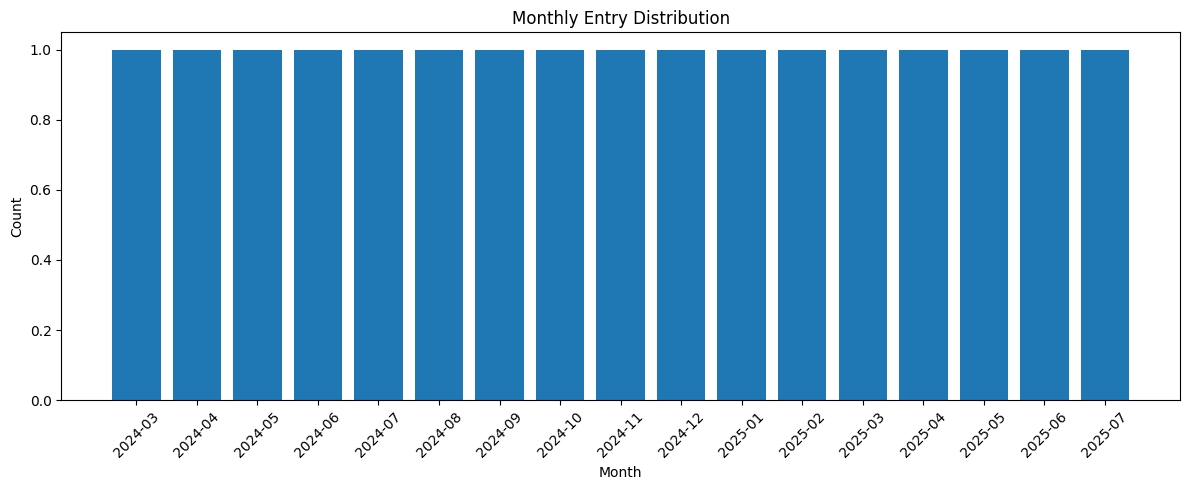

In [ ]:
# Plot distribution of dates in this table. 
monthly_counts = df_CM_metrics_clean['date'].dt.to_period('M').value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.title('Monthly Entry Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* There are 16 entries. One entry per month. 

6.2.3. CM MRR Components

In [ ]:
df_CM_mrr_components_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17 non-null     object 
 1   mrr                17 non-null     int64  
 2   percentage-change  17 non-null     float64
 3   mrr-new-business   17 non-null     int64  
 4   mrr-expansion      17 non-null     int64  
 5   mrr-contraction    17 non-null     int64  
 6   mrr-churn          17 non-null     int64  
 7   mrr-reactivation   17 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.2+ KB


In [ ]:
df_CM_mrr_components_clean['date'].value_counts()

date
2024-03-31    1
2024-04-30    1
2024-05-31    1
2024-06-30    1
2024-07-31    1
2024-08-31    1
2024-09-30    1
2024-10-31    1
2024-11-30    1
2024-12-31    1
2025-01-31    1
2025-02-28    1
2025-03-31    1
2025-04-30    1
2025-05-31    1
2025-06-30    1
2025-07-31    1
Name: count, dtype: int64

In [ ]:
df_CM_mrr_components_clean['date'].nunique()

17

In [ ]:
# Convert to datetime
df_CM_mrr_components_clean['date'] = pd.to_datetime(df_CM_mrr_components_clean['date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Confirm conversion worked correctly:
df_CM_mrr_components_clean['date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Create month column
df_CM_mrr_components_clean['month'] = df_CM_mrr_components_clean['date'].dt.to_period('M')

# Create year column
df_CM_mrr_components_clean['year'] = df_CM_mrr_components_clean['date'].dt.to_period('Y')

# View result
df_CM_mrr_components_clean.head(2)

,date,mrr,percentage-change,mrr-new-business,mrr-expansion,mrr-contraction,mrr-churn,mrr-reactivation,month,year
0,2024-03-31,0,0.0,0,0,0,0,0,2024-03,2024
1,2024-04-30,27900,0.0,27900,0,0,0,0,2024-04,2024


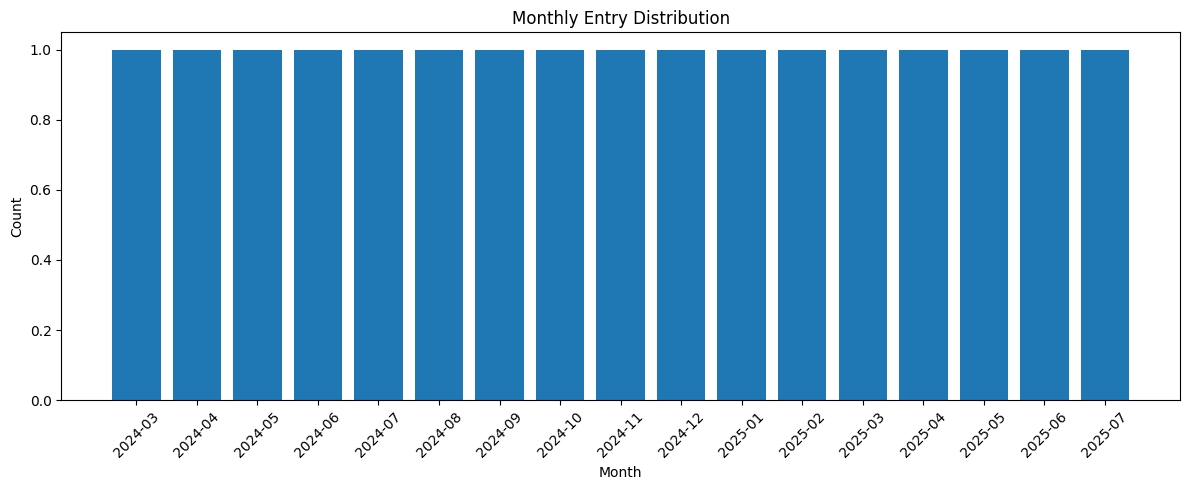

In [ ]:
# Plot distribution of dates in this table. 
monthly_counts = df_CM_mrr_components_clean['date'].dt.to_period('M').value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.title('Monthly Entry Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Also 16 entries, and one entry per month (same as in the metrics table). 

6.1.4. HD Invoices

In [ ]:
df_HD_invoices_clean.head(2)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.00,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN
1,68640b2e4d4b9230af022eb5,67ae2899d92c82a3ed0c50ad,Manum Training & Development S.L,7BE139D9-5820,2025-06-29 22:00:00,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 74.50413223...",15.65,74.50,0.0,90.15,es,1,[],F250384,eur,1,"[{'id': '6864fa85ba573f3f0e088f2c', 'amount': ...",90.15,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df_HD_invoices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1111 non-null   object 
 1   contact                 1111 non-null   object 
 2   contactName             1111 non-null   object 
 3   desc                    366 non-null    object 
 4   date                    1111 non-null   object 
 5   dueDate                 32 non-null     float64
 6   multipledueDate         1079 non-null   object 
 7   forecastDate            0 non-null      float64
 8   notes                   0 non-null      float64
 9   tags                    1111 non-null   object 
 10  products                1111 non-null   object 
 11  tax                     1111 non-null   float64
 12  subtotal                1111 non-null   float64
 13  discount                1111 non-null   float64
 14  total                   1111 non-null   

In [ ]:
# 1. Create a clean datetime column (for clarity, optional if already exists)
df_HD_invoices_clean['datetime'] = pd.to_datetime(df_HD_invoices_clean['date'])

# 2. Create a new date-only column
df_HD_invoices_clean['date'] = pd.to_datetime(df_HD_invoices_clean['date'], errors='coerce').dt.normalize()


In [ ]:
# Confirm data type conversion successful
df_HD_invoices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1111 non-null   object        
 1   contact                 1111 non-null   object        
 2   contactName             1111 non-null   object        
 3   desc                    366 non-null    object        
 4   date                    1111 non-null   datetime64[ns]
 5   dueDate                 32 non-null     float64       
 6   multipledueDate         1079 non-null   object        
 7   forecastDate            0 non-null      float64       
 8   notes                   0 non-null      float64       
 9   tags                    1111 non-null   object        
 10  products                1111 non-null   object        
 11  tax                     1111 non-null   float64       
 12  subtotal                1111 non-null   float64 

In [ ]:
# Create month column
df_HD_invoices_clean['month'] = df_HD_invoices_clean['date'].dt.to_period('M')

# Create year column
df_HD_invoices_clean['year'] = df_HD_invoices_clean['date'].dt.to_period('Y')

# View result
df_HD_invoices_clean.head(2)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount,datetime,month,year
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.00,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06,2025
1,68640b2e4d4b9230af022eb5,67ae2899d92c82a3ed0c50ad,Manum Training & Development S.L,7BE139D9-5820,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 74.50413223...",15.65,74.50,0.0,90.15,es,1,[],F250384,eur,1,"[{'id': '6864fa85ba573f3f0e088f2c', 'amount': ...",90.15,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06,2025


In [ ]:
df_HD_invoices_clean['date'].value_counts().sort_index()

date
2024-04-29      1
2024-05-30      2
2024-06-29      1
2024-07-30      1
2024-07-31      1
2024-08-02      1
2024-08-04      1
2024-08-05      2
2024-08-07      1
2024-08-09      1
2024-08-10      2
2024-08-12      1
2024-08-15      2
2024-08-17      2
2024-08-18      1
2024-08-23      2
2024-08-24      1
2024-08-26      1
2024-08-27      1
2024-08-28      1
2024-08-29      1
2024-08-30      1
2024-08-31      1
2024-09-02      1
2024-09-04      2
2024-09-05      5
2024-09-09      2
2024-09-10      1
2024-09-11      4
2024-09-14      1
2024-09-15      1
2024-09-16      2
2024-09-17      2
2024-09-18      1
2024-09-19      1
2024-09-23      3
2024-09-24      1
2024-09-26      2
2024-09-27      1
2024-09-29      2
2024-09-30      1
2024-10-02      2
2024-10-04      1
2024-10-05      3
2024-10-08    191
2024-10-09      3
2024-10-10      1
2024-10-11      3
2024-10-13     17
2024-10-14      6
2024-10-15      4
2024-10-16      6
2024-10-17      5
2024-10-18      1
2024-10-20      3
2024-

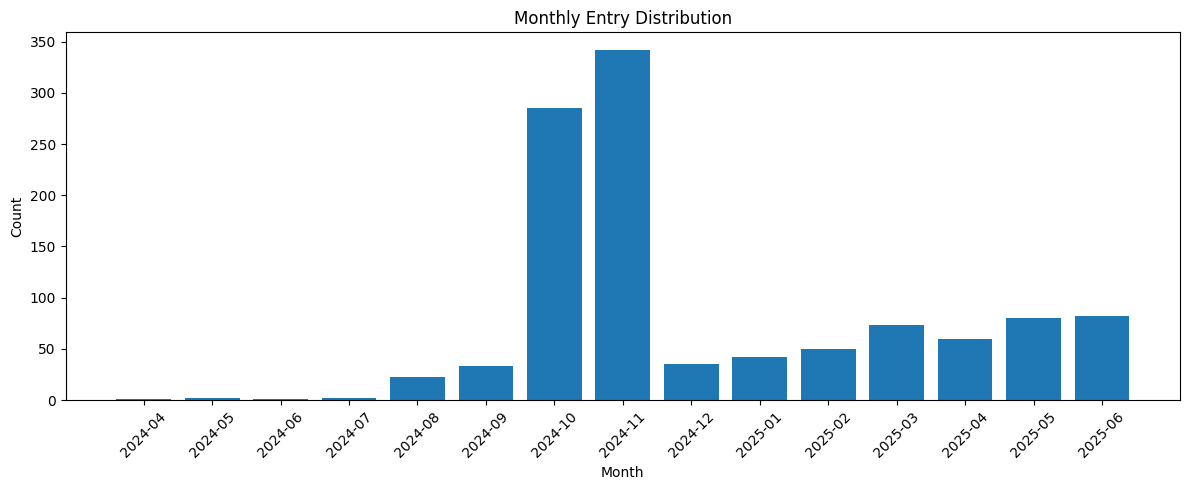

In [ ]:
# Plot distribution of dates in this table. 
monthly_counts = df_HD_invoices_clean['date'].dt.to_period('M').value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.title('Monthly Entry Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6.1.5. HD Payments

In [ ]:
df_HD_payments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1652 non-null   object 
 1   bankId        1587 non-null   object 
 2   contactId     1000 non-null   object 
 3   contactName   1000 non-null   object 
 4   amount        1652 non-null   float64
 5   desc          1651 non-null   object 
 6   change        0 non-null      float64
 7   documentType  1652 non-null   object 
 8   documentId    1652 non-null   object 
 9   payment_date  1652 non-null   object 
dtypes: float64(2), object(8)
memory usage: 129.2+ KB


In [ ]:
df_HD_payments_clean['payment_date'].value_counts()

payment_date
2024-10-21 22:00:00    13
2024-06-30 22:00:00    11
2024-05-30 22:00:00    10
2025-04-28 00:00:00     7
2024-09-09 00:00:00     7
2025-05-28 00:00:00     7
2025-06-27 00:00:00     6
2025-05-28 22:00:00     6
2025-06-24 22:00:00     6
2025-06-02 22:00:00     6
2024-09-04 22:00:00     6
2025-02-28 00:00:00     6
2024-10-20 22:00:00     6
2025-05-12 22:00:00     6
2025-03-28 00:00:00     6
2024-11-28 00:00:00     6
2025-06-26 22:00:00     6
2025-01-06 23:00:00     5
2025-06-04 00:00:00     5
2024-12-27 00:00:00     5
2025-02-27 00:00:00     5
2024-11-10 23:00:00     5
2024-09-30 22:00:00     5
2024-07-22 22:00:00     5
2024-05-05 22:00:00     5
2024-05-31 00:00:00     5
2025-01-28 00:00:00     5
2025-06-10 22:00:00     5
2025-05-29 22:00:00     5
2025-05-04 22:00:00     5
2025-02-12 23:00:00     5
2025-03-20 23:00:00     4
2025-05-20 22:00:00     4
2025-05-15 22:00:00     4
2025-06-19 22:00:00     4
2025-06-09 22:00:00     4
2025-01-30 23:00:00     4
2025-05-26 22:00:00     4

In [ ]:
# 1. Create a clean datetime column 
df_HD_payments_clean['datetime'] = pd.to_datetime(df_HD_payments_clean['payment_date'])

# 2. Create a new date-only column
df_HD_payments_clean['date'] = pd.to_datetime(df_HD_payments_clean['payment_date'], errors='coerce').dt.normalize()

In [ ]:
# Create month column
df_HD_payments_clean['month'] = df_HD_payments_clean['date'].dt.to_period('M')

# Create year column
df_HD_payments_clean['year'] = df_HD_payments_clean['date'].dt.to_period('Y')

# View result
df_HD_payments_clean.head(2)

,id,bankId,contactId,contactName,amount,desc,change,documentType,documentId,payment_date,datetime,date,month,year
0,686807f7f5c7d4b88d0df1fe,6697ee29ecc2d0d7aa0e0db5,679aa945082f148e4508e16f,Deeptrace Inc.,-424.10,Compra 25365C73-0004 Fra. 25365C73-0004 Deeptr...,NaN,trans,686807cb217039daac0b90ce,2025-07-03 00:00:00,2025-07-03 00:00:00,2025-07-03,2025-07,2025
1,6868045445290b8e4f08fee8,6697e93c6fb022a948097230,NaN,NaN,2311.08,"TRANSFERENCIA DE STRIPE, CONCEPTO STRIPE.",NaN,trans,6866f63cbdffb6e3b70d8136,2025-07-02 22:00:00,2025-07-02 22:00:00,2025-07-02,2025-07,2025


In [ ]:
df_HD_payments_clean['date'].nunique()

393

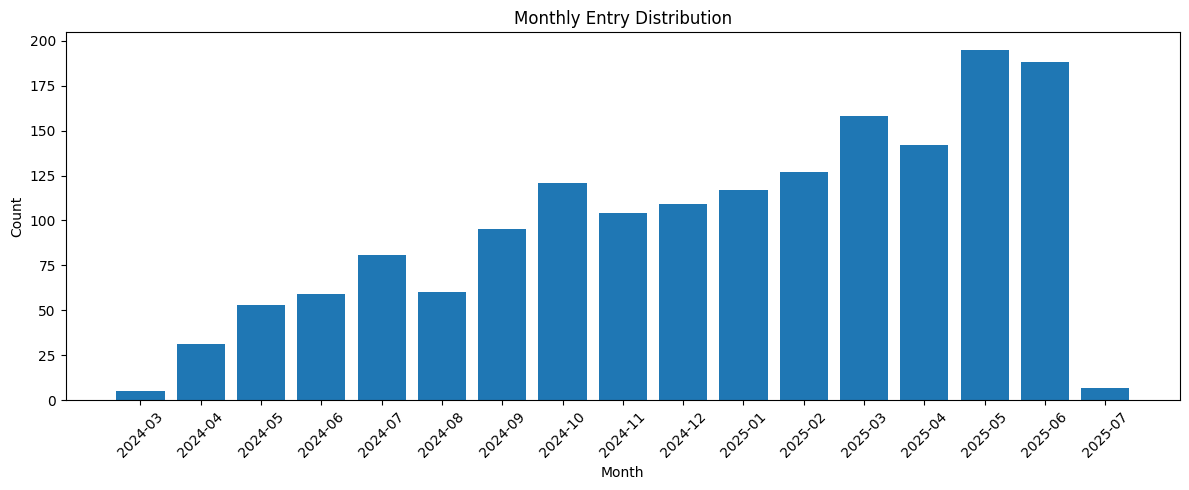

In [ ]:
# Plot distribution of dates in this table. 
monthly_counts = df_HD_payments_clean['date'].dt.to_period('M').value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.title('Monthly Entry Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6.2. MRR

✅ Ready to use.

In [ ]:
df_CM_mrr_components_clean['mrr-new-business']


0          0
1      27900
2      23600
3      26000
4      70479
5          0
6      24797
7     138400
8      74879
9      43320
10     28259
11     91617
12    247134
13     69041
14    223445
15    354716
16     29700
Name: mrr-new-business, dtype: int64

In [ ]:
df_final['mrr'] = df_CM_mrr_components_clean['mrr'].copy()
# Add new column by creating a copy of the relevant column. (Needs to be a copy!)

In [ ]:
df_CM_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   17 non-null     datetime64[ns]
 1   mrr                                    17 non-null     int64         
 2   mrr-percentage-change                  17 non-null     float64       
 3   arr                                    17 non-null     int64         
 4   arr-percentage-change                  17 non-null     float64       
 5   customer-churn-rate                    17 non-null     float64       
 6   customer-churn-rate-percentage-change  17 non-null     float64       
 7   mrr-churn-rate                         17 non-null     float64       
 8   mrr-churn-rate-percentage-change       17 non-null     float64       
 9   ltv                                    17 non-null     int64       

6.2. New MRR 

✅ Ready to use.

In [ ]:
df_CM_mrr_components_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17 non-null     datetime64[ns]
 1   mrr                17 non-null     int64         
 2   percentage-change  17 non-null     float64       
 3   mrr-new-business   17 non-null     int64         
 4   mrr-expansion      17 non-null     int64         
 5   mrr-contraction    17 non-null     int64         
 6   mrr-churn          17 non-null     int64         
 7   mrr-reactivation   17 non-null     int64         
 8   month              17 non-null     period[M]     
 9   year               17 non-null     period[Y-DEC] 
dtypes: datetime64[ns](1), float64(1), int64(6), period[M](1), period[Y-DEC](1)
memory usage: 1.5 KB


In [ ]:
df_final['new_mrr'] = df_CM_mrr_components_clean['mrr-new-business'].copy()
# Add new column by creating a copy of the relevant column. (Needs to be a copy!)

6.3. Net New MRR

⚠️ Needs to be engineered.

Net New MRR = New MRR + Expansion MRR - Contraction MRR (For a given time period)

In [ ]:
# Create the column in the final dataframe:
df_final['net_new_mrr'] = (
    df_CM_mrr_components_clean['mrr-new-business'].copy() +    # New customers
    df_CM_mrr_components_clean['mrr-reactivation'].copy() +    # Previously churned customers who have come back
    df_CM_mrr_components_clean['mrr-expansion'].copy() -       # Upgrades, seat expansion, feature expansion ... 
    df_CM_mrr_components_clean['mrr-churn'].copy() -           # Customers who left this month
    df_CM_mrr_components_clean['mrr-contraction'].copy()       # Downgrades, seat reduction, feature reduction ...
)

In [ ]:
# Check that all components are in the same time period frequency:
df_CM_mrr_components_clean['date'].head(5)
# Confirmed. Entries are monthly.

0   2024-03-31
1   2024-04-30
2   2024-05-31
3   2024-06-30
4   2024-07-31
Name: date, dtype: datetime64[ns]

In [ ]:
# Make sure each date has all of the necessary components:
df_check = df_CM_mrr_components_clean.groupby('date').agg({
    'mrr-new-business' : 'sum',
    'mrr-reactivation' : 'sum',
    'mrr-expansion' : 'sum',
    'mrr-churn' : 'sum',
    'mrr-contraction' : 'sum'
})
df_check
# All components are present and valid. The column added to df_final should be correct.
# (the presence of zeros is fine, what would be a problem is if there were null values / NaN).


,mrr-new-business,mrr-reactivation,mrr-expansion,mrr-churn,mrr-contraction
date,,,,,
2024-03-31,0,0,0,0,0
2024-04-30,27900,0,0,0,0
2024-05-31,23600,0,4900,0,0
2024-06-30,26000,0,0,0,-6900
2024-07-31,70479,0,12793,-3500,-1544
2024-08-31,0,0,6751,0,0
2024-09-30,24797,0,9897,-2500,-2021
2024-10-31,138400,0,4371,-14700,-147
2024-11-30,74879,0,37,-8918,-16909


6.4. ARR

✅ Ready to use.

In [ ]:
df_CM_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   17 non-null     datetime64[ns]
 1   mrr                                    17 non-null     int64         
 2   mrr-percentage-change                  17 non-null     float64       
 3   arr                                    17 non-null     int64         
 4   arr-percentage-change                  17 non-null     float64       
 5   customer-churn-rate                    17 non-null     float64       
 6   customer-churn-rate-percentage-change  17 non-null     float64       
 7   mrr-churn-rate                         17 non-null     float64       
 8   mrr-churn-rate-percentage-change       17 non-null     float64       
 9   ltv                                    17 non-null     int64       

In [ ]:
df_final['arr'] = df_CM_metrics_clean['arr'].copy()
# Add new column by creating a copy of the relevant column. (Needs to be a copy!)

6.5. ARPA

✅ Ready to use. 

In [ ]:
df_final['arpa'] = df_CM_metrics_clean['arpa'].copy()
# Add new column by creating a copy of the relevant column. (Needs to be a copy!)

6.6. EBITDA

⚠️ Needs to be engineered.

        EBITDA = Revenue - Operating Expenses (Excluding Interest, Taxes, Depreciation and Amortization)

In a SaaS context this should be:

        EBITDA = Revenue - Operating Cost (Operating Costs typically includes Salaries, Marketing, Software, Hosting and Admin but not Interest, Taxes, etc.)

In [ ]:
# Operating_Costs = CAC + COGS + OPEX


In [ ]:
df_HD_contacts_raw.head(3)
# Cruzar Contacts con Invoices (contact tiene los tags)

,id,customId,name,code,vatnumber,tradeName,email,mobile,phone,type,iban,swift,groupId,clientRecord,supplierRecord,billAddress,customFields,defaults,socialNetworks,tags,notes,contactPersons,shippingAddresses,isperson,createdAt,updatedAt,updatedHash
0,6694f45fc6f6db032502c35b,5863162.0,Framer B.V.,NL853695386B01,NL853695386B01,Framer B.V.,,NaN,None,supplier,,,,0,"{'num': 40000001, 'name': 'Framer B.V.'}","{'address': None, 'city': None, 'postalCode': ...",[],"{'salesChannel': 0, 'expensesAccount': '6694dc...",[],[],[],[],[],0,1721037919,1752113735,4cb228275dd3ce70c78ecdd623f9db0b
1,6694f5a3919746067d00ab14,5863272.0,"KOMBO SOLUTIONS, S.L",B70637756,B70637756,"KOMBO SOLUTIONS, S.L",,NaN,None,supplier,,,,0,"{'num': 40000002, 'name': 'KOMBO SOLUTIONS, S.L'}","{'address': None, 'city': None, 'postalCode': ...",[],"{'salesChannel': 0, 'expensesAccount': '66a107...",{'website': ''},[],[],[],[],0,1721038243,1752113733,7668615da3ade5d83fa1734ab9f973fb
2,6694f65bad0998298507286e,5863352.0,"CEASA ASESORES FISCALES, S.L.",B60036787,B60036787,"CEASA ASESORES FISCALES, S.L.",,NaN,None,supplier,,,,0,"{'num': 41000002, 'name': 'CEASA ASESORES FISC...","{'address': None, 'city': None, 'postalCode': ...",[],"{'salesChannel': 0, 'expensesAccount': '668572...",{'website': ''},[],[],[],[],0,1721038427,1752113728,2c41e4b7f6dbbeae049235d568bbce05


6.6.1. Calculate Revenue

We can engineer Revenue by adding up the 'total' column (the amount) in the Invoices table. 

We need to remember to filter for Invoices with the value 1 in the 'status' column, in order to include only paid invoices. 




In [ ]:
df_HD_invoices_clean.head(1)
# We have the 'total' column which equates to Revenue Month over Month.

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount,datetime,month,year
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.0,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06,2025


In [ ]:
# Group and sum rows in 'total' column to calculate Revenue
df_monthly_revenue = df_HD_invoices_clean.groupby('month')['total'].sum().reset_index()
df_monthly_revenue.rename(columns={'total': 'revenue'}, inplace=True)

# Sort by month (in case).
df_monthly_revenue = df_monthly_revenue.sort_values('month')

In [ ]:
# Convert 'month' to timestamp, not period data type. 
df_monthly_revenue['month'] = df_monthly_revenue['month'].dt.to_timestamp()


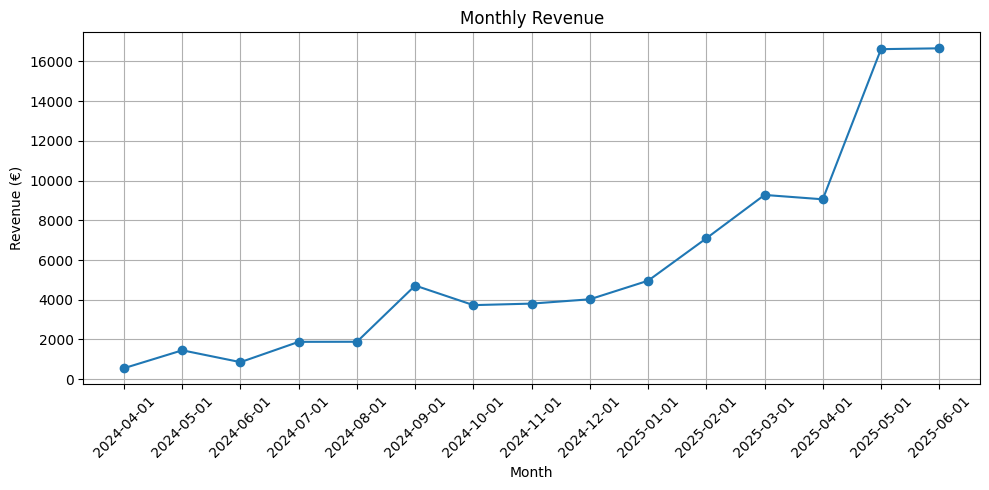

In [ ]:
# Ensure the month is a string for better x-axis display
df_monthly_revenue['month_str'] = df_monthly_revenue['month'].astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_revenue['month_str'], df_monthly_revenue['revenue'], marker='o', linestyle='-')

# Formatting
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

6.6.2. Calculate Operating Costs

I can use the Contacts Lookup table I got from Accounting, as it has the relevant tags (CAC/COGS/OPEX), but I will have to connect it with Contacts Clean before I can merge it with the Purchases table, which has the details of company costs, since the Contacts Lookup table doesn't have an ID column that matches the ID values in Purchases. 

In [ ]:
df_HD_purchases_clean.head(2)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsTotal,paymentsPending,paymentsRefunds,paymentsDetail,multipledueDate.date,multipledueDate.amount,from.id,from.docType
0,6870b8cf93b086c11f04777f,6694febb64ba6319900bcdcf,FULL ENRICH (FULL ENRICH),Fra. 1449FF9-0007 FULL ENRICH,2025-07-09 22:00:00,NaN,[],NaN,NaN,[],"[{'name': 'Fra. 1449FF9-0007 FULL ENRICH', 'de...",0.0,370.00,0,370.00,es,0,[],1449FF9-0007,eur,1.000000,0.0,370.00,0,NaN,NaN,NaN,NaN,NaN
1,686f9d91ac4a87122c029343,686f9d2da3972b9b98032aff,CloudTalk S. Γ. O. (CloudTalk S. Γ. O.),Fra. 25014245 CloudTalk S. Γ. O.,2025-07-07 22:00:00,NaN,[],NaN,NaN,['moneda'],"[{'name': 'Fra. 25014245 CloudTalk S. Γ. O.', ...",0.0,17.04,0,17.04,NaN,0,[],25014245,usd,1.173489,0.0,17.04,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert 'date' column to datetime (if not already)
df_HD_purchases_clean['date'] = pd.to_datetime(df_HD_purchases_clean['date'], errors='coerce')

# Create a 'month' column
df_HD_purchases_clean['month'] = df_HD_purchases_clean['date'].dt.to_period("M")

In [ ]:
# Rename Tag columns to remove whitespace and make more concise
df_HD_contacts_lookup = df_HD_contacts_lookup.rename(columns={"Tag 1 - Cost Structure": "cost_structure", "Tag 2 - Department": "department", "Tag 3 - Cost Type":"cost_type"})
df_HD_contacts_lookup.head(1)

,Creado,Nombre,cost_structure,department,cost_type,ID,País,Código país,Idioma,Moneda,Cuenta,Referencia,Régimen,Cuenta de compras,Tipo,Tipo de contacto
0,04/06/25,"Nexxo Legal, S.L.P. - Nexxo Legal, S.L.P.",Opex,LEG,Provider,B44586592,España,ES,Español,Euro,41000117.0,10730846.0,Régimen general,Servicios de profesionales independientes,Proveedor,Empresa


In [ ]:
df_HD_contacts_clean.head(2)

,id,customId,name,code,vatnumber,tradeName,email,mobile,phone,type,iban,swift,groupId,clientRecord,customFields,socialNetworks,tags,notes,contactPersons,shippingAddresses,isperson,createdAt,updatedAt,updatedHash,supplierRecord.num,supplierRecord.name,billAddress.address,billAddress.city,billAddress.postalCode,billAddress.province,billAddress.country,billAddress.countryCode,billAddress.info,defaults.salesChannel,defaults.expensesAccount,defaults.dueDays,defaults.paymentDay,defaults.paymentMethod,defaults.discount,defaults.language,defaults.currency,defaults.salesTax,defaults.purchasesTax,defaults.accumulateInForm347,socialNetworks.website,supplierRecord,clientRecord.num,clientRecord.name
0,6694f45fc6f6db032502c35b,5863162.0,Framer B.V.,NL853695386B01,NL853695386B01,Framer B.V.,NaN,NaN,NaN,supplier,NaN,NaN,NaN,0.0,[],[],[],[],[],[],0,2024-07-15 10:05:19,2025-07-10 02:15:35,4cb228275dd3ce70c78ecdd623f9db0b,40000001.0,Framer B.V.,NaN,NaN,NaN,NaN,Países Bajos,NL,NaN,0,6694dc01140acf9e000425c2,0,0,0,0,es,eur,[],[],no,NaN,NaN,NaN,NaN
1,6694f5a3919746067d00ab14,5863272.0,"KOMBO SOLUTIONS, S.L",B70637756,B70637756,"KOMBO SOLUTIONS, S.L",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0.0,[],NaN,[],[],[],[],0,2024-07-15 10:10:43,2025-07-10 02:15:33,7668615da3ade5d83fa1734ab9f973fb,40000002.0,"KOMBO SOLUTIONS, S.L",NaN,NaN,8013.0,NaN,España,ES,NaN,0,66a107fcafde0ca4240e0a40,0,0,0,0,es,eur,[],['p_iva_21'],yes,NaN,NaN,NaN,NaN


In [ ]:
# Merge 'cost_structure' column into Contacts_clean table
df_contacts_enriched = df_HD_contacts_clean.merge(
    df_HD_contacts_lookup,
    left_on='vatnumber',
    right_on='ID',
    how='left'
)


In [ ]:
# Create a Clean Supplier–Cost Table
df_supplier_costs = (
    df_contacts_enriched[['name', 'vatnumber', 'cost_structure', 'cost_type']]
    .drop_duplicates()
    .sort_values(by=['name', 'cost_structure', 'cost_type'])
    .reset_index(drop=True)
)
df_supplier_costs.head(10)

,name,vatnumber,cost_structure,cost_type
0,"4FOREVERYTHING, SL",NaN,NaN,NaN
1,ADELINA PELTEA,Y6214067X,CAC,Provider
2,ALFA EDGE SL,NaN,NaN,NaN
3,AUDISEC SEGURIDAD DE LA INFORMACION SOCIEDAD L...,NaN,NaN,NaN
4,AVPS SRL,13422720964,CAC,Provider
5,Adcando Producciones S.L,NaN,NaN,NaN
6,Adiodoro,NaN,NaN,NaN
7,Ale Pintaudi,NaN,NaN,NaN
8,Alessandro Marotto,IT01672480918,CAC,Provider
9,Alexander Dakov,NaN,NaN,NaN


In [ ]:
# Merge Purchases with Enriched Contacts
df_purchases_enriched = df_HD_purchases_clean.merge(
    df_contacts_enriched[['id', 'cost_structure', 'cost_type']],
    left_on='contact',
    right_on='id',
    how='left'
)

In [ ]:
# Verify the merge worked correctly 
df_purchases_enriched[['contactName', 'cost_structure', 'cost_type']].sample(10)
df_purchases_enriched.isna().sum().sort_values(ascending=False)

forecastDate              624
notes                     624
from.docType              622
from.id                   622
multipledueDate.amount    609
dueDate                   609
multipledueDate.date      609
language                  274
cost_type                  69
cost_structure             69
id_y                       19
paymentsDetail             17
multipledueDate            15
desc                        3
id_x                        0
contact                     0
date                        0
status                      0
total                       0
discount                    0
subtotal                    0
products                    0
tax                         0
tags                        0
contactName                 0
paymentsRefunds             0
paymentsPending             0
paymentsTotal               0
currencyChange              0
docNumber                   0
currency                    0
customFields                0
month                       0
dtype: int

In [ ]:
# There are 29 rows, or 8 contacts, that do not appear in the contacts table. 
df_purchases_enriched[df_purchases_enriched['cost_structure'].isna()]['contact'].value_counts()

contact
6694f881e793fd466106a51f    17
6694f3fb49a286777c0c6836    16
66a0ea99d6f58778f403e2e8    13
6731c1d137770bc695046694    10
67c878404e7cee4d280053c0     3
66fb2da289edca94430def38     3
67694ba59086600ce200cb9a     2
682de429919ab2a6d20c57fc     2
686f9d2da3972b9b98032aff     1
686804f1fcb248d793050243     1
6863a12953a0884bee0b4854     1
Name: count, dtype: int64

In [ ]:
# Filter relevant purchases (non-null cost structure and non-null amount)
df_operating_costs = df_purchases_enriched[
    df_purchases_enriched['cost_structure'].notna() &
    df_purchases_enriched['total'].notna()
].copy()

In [ ]:
# Add a month column (for time-based analysis)
df_operating_costs['date'] = pd.to_datetime(df_operating_costs['date'], errors='coerce')
df_operating_costs['month'] = df_operating_costs['date'].dt.to_period('M').astype(str)

In [ ]:
# Step 1: Convert 'date' column to datetime (if not already)
df_HD_purchases_clean['date'] = pd.to_datetime(df_HD_purchases_clean['date'], errors='coerce')

# Step 2: Create a 'month' column
df_HD_purchases_clean['month'] = df_HD_purchases_clean['date'].dt.to_period("M")

# Step 3: Group by month and sum the 'total' column
df_monthly_purchases = (
    df_HD_purchases_clean
    .groupby('month')['total']
    .sum()
    .reset_index()
    .sort_values('month')
)

# Step 4: (Optional) Convert month to timestamp for plotting
df_monthly_purchases['month'] = df_monthly_purchases['month'].dt.to_timestamp()

# Display result
display(df_monthly_purchases)


,month,total
0,2024-03-01,4.62
1,2024-04-01,15676.83
2,2024-05-01,13413.36
3,2024-06-01,31354.23
4,2024-07-01,19462.17
5,2024-08-01,10033.04
6,2024-09-01,36133.74
7,2024-10-01,19053.74
8,2024-11-01,26031.91
9,2024-12-01,21581.33


In [ ]:
df_operating_costs_monthly = (
    df_operating_costs[df_operating_costs['cost_structure'] == 'Opex']
    .groupby('month')['total']
    .sum()
    .reset_index()
    .sort_values('month')
)

display(df_operating_costs_monthly)

,month,total
0,2024-03,4.62
1,2024-04,7842.53
2,2024-05,13122.96
3,2024-06,11526.46
4,2024-07,19106.45
5,2024-08,9582.87
6,2024-09,24884.85
7,2024-10,13167.14
8,2024-11,13817.57
9,2024-12,13851.88


In [ ]:
# Group by cost structure and or month
df_summary = df_operating_costs.groupby(['month', 'cost_structure'])['total'].sum().reset_index()

In [ ]:
# Total per category
df_summary_overall = df_operating_costs.groupby('cost_structure')['total'].sum().reset_index()

In [ ]:
total_operating_costs = df_operating_costs['total'].sum()

In [ ]:
# Monthly Operating Costs
df_operating_costs['month'] = pd.to_datetime(df_operating_costs['date']).dt.to_period('M')
df_monthly_operating_costs = (
    df_operating_costs.groupby('month')['total']
    .sum()
    .reset_index()
    .rename(columns={'total': 'operating_costs'})
)

# Convert to Timestamp for merge compatibility
df_monthly_operating_costs['month'] = df_monthly_operating_costs['month'].dt.to_timestamp()

In [ ]:
# Merge Revenue with Operating Costs to create EBITDA dataframe
df_ebitda = pd.merge(df_monthly_revenue, df_monthly_operating_costs, on='month', how='outer')
df_ebitda['ebitda'] = df_ebitda['revenue'] - df_ebitda['operating_costs']

In [ ]:
# Fill NaNs with 0
df_ebitda.fillna(0, inplace=True)


In [ ]:
df_ebitda.sort_values(by='month')

,month,revenue,month_str,operating_costs,ebitda
0,2024-03-01,0.00,0,4.62,0.00
1,2024-04-01,554.00,2024-04-01,30927.75,-30373.75
2,2024-05-01,1454.06,2024-05-01,21818.12,-20364.06
3,2024-06-01,857.49,2024-06-01,28655.48,-27797.99
4,2024-07-01,1880.16,2024-07-01,27485.38,-25605.22
5,2024-08-01,1883.96,2024-08-01,12238.84,-10354.88
6,2024-09-01,4715.13,2024-09-01,47576.18,-42861.05
7,2024-10-01,3728.86,2024-10-01,28354.72,-24625.86
8,2024-11-01,3805.29,2024-11-01,33990.81,-30185.52
9,2024-12-01,4022.92,2024-12-01,19974.64,-15951.72


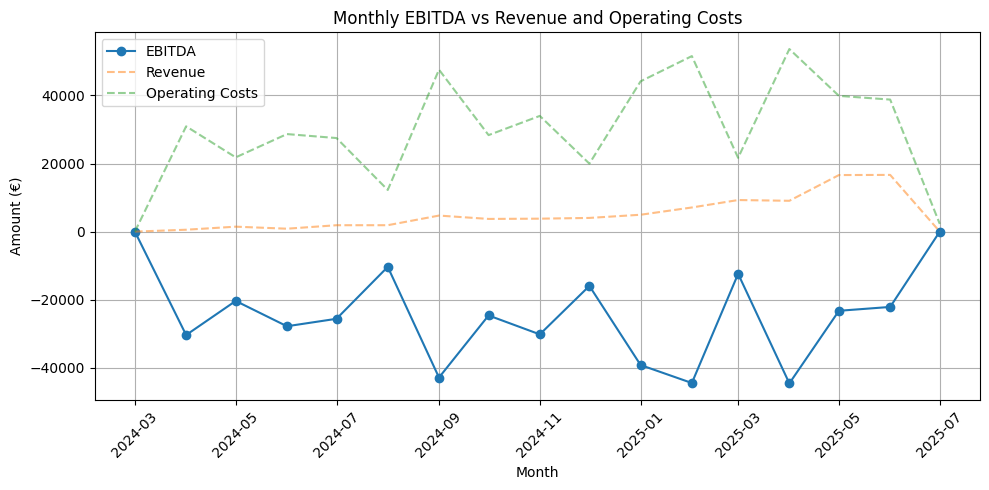

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_ebitda['month'], df_ebitda['ebitda'], marker='o', label='EBITDA')
plt.plot(df_ebitda['month'], df_ebitda['revenue'], linestyle='--', alpha=0.5, label='Revenue')
plt.plot(df_ebitda['month'], df_ebitda['operating_costs'], linestyle='--', alpha=0.5, label='Operating Costs')

plt.title("Monthly EBITDA vs Revenue and Operating Costs")
plt.xlabel("Month")
plt.ylabel("Amount (€)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6.7. CAC

CAC = Total Sales & Marketing Costs / Number of New Customers Acquired

#### In order to create the metric *Customer Acquisition Cost* at a monthly level, we will start by calculating the amount spent on Sales and Marketing at the monthly level. We can do this by:


#### 6.7.1. Sales + Marketing Costs (Purchases > cost_type > "CAC")


      1. Filter for rows/entries in Purchases table with 
         the tag 'CAC' in the 'cost_type' column.
         
      2. Convert 'date' column to datetime data type.

      3. Create 'month' column, using datetime 'date' column.

      4. Group rows/entries in Purchases table by month, and sum 
         the value of the 'total'column by grouped monthly "Purchases" 
         (hereafter referred to as Monthly CAC Spend). 

______________________________________________________________________
         
      5. Result: *Global CAC Spend*. 
         Not the final CAC metric, but the numerator
         of CAC Formula at the monthly level.
______________________________________________________________________

In [ ]:
# CALCULATE MONTHLY CAC SPEND:
# ____________________________

# 1. Filter for CAC-related purchases
df_cac_purchases = df_purchases_enriched[df_purchases_enriched['cost_type'] == 'CAC'].copy()

# 2. Ensure the 'date' column is datetime
df_cac_purchases['date'] = pd.to_datetime(df_cac_purchases['date'], errors='coerce')

# 3. Create a 'month' column (normalized to first of month)
df_cac_purchases['month'] = df_cac_purchases['date'].dt.to_period('M').dt.to_timestamp()

# 4. Group by month to get total CAC cost
df_monthly_cac = (
    df_cac_purchases
    .groupby('month')['total']
    .sum()
    .reset_index()
    .rename(columns={'total': 'cac_cost'})
)


#### 6.7.2. Monthly New Customers (Holded Invoices > date > First invoice per customer)


      1. Convert Invoices 'date' column to datetime data type.
         
      2. Keep only *FIRST INVOICE PER CUSTOMER*.

      3. Create 'month' column from datetime 'date' column.

      4. Group Customers in the  

______________________________________________________________________
         
      5. Result: *Global CAC Spend*. 
         Not the final CAC metric, but the numerator
         of CAC Formula at the monthly level.
______________________________________________________________________

In [ ]:
# CALCULATE MONTHLY NEW CUSTOMERS:
# ________________________________
# 1. Ensure the invoice 'date' is datetime
df_HD_invoices_clean['date'] = pd.to_datetime(df_HD_invoices_clean['date'], errors='coerce')

# 2. Find ONLY THE FIRST invoice date per customer
df_first_invoice = (
    df_HD_invoices_clean
    .groupby('contact')['date']
    .min()
    .reset_index()
    .rename(columns={'date': 'first_invoice_date'})
)

# 3. Add 'month' column to indicate when each customer first appeared
df_first_invoice['month'] = df_first_invoice['first_invoice_date'].dt.to_period('M').dt.to_timestamp()

# 4. Count number of new customers per month
df_monthly_new_customers = (
    df_first_invoice
    .groupby('month')['contact']
    .count()
    .reset_index()
    .rename(columns={'contact': 'new_customers'})
)


In [ ]:
# COMBINE AND CALCULATE CAC PER NEW CUSTOMER:
# ___________________________________________
# 1. Merge CAC cost and new customer count
df_cac = pd.merge(df_monthly_cac, df_monthly_new_customers, on='month', how='outer').fillna(0)

# 2. Calculate CAC per new customer (with protection against divide-by-zero)
df_cac['cac_per_customer'] = df_cac.apply(
    lambda row: row['cac_cost'] / row['new_customers'] if row['new_customers'] > 0 else 0,
    axis=1
)


In [ ]:
df_cac = df_cac.sort_values(by='month')
df_cac

,month,cac_cost,new_customers,cac_per_customer
0,2024-04-01,0.0,1,0.0
1,2024-07-01,0.0,1,0.0
2,2024-08-01,0.0,18,0.0
3,2024-09-01,0.0,10,0.0
4,2024-10-01,0.0,280,0.0
5,2024-11-01,0.0,136,0.0
6,2024-12-01,0.0,9,0.0
7,2025-01-01,0.0,15,0.0
8,2025-02-01,0.0,18,0.0
9,2025-03-01,0.0,26,0.0


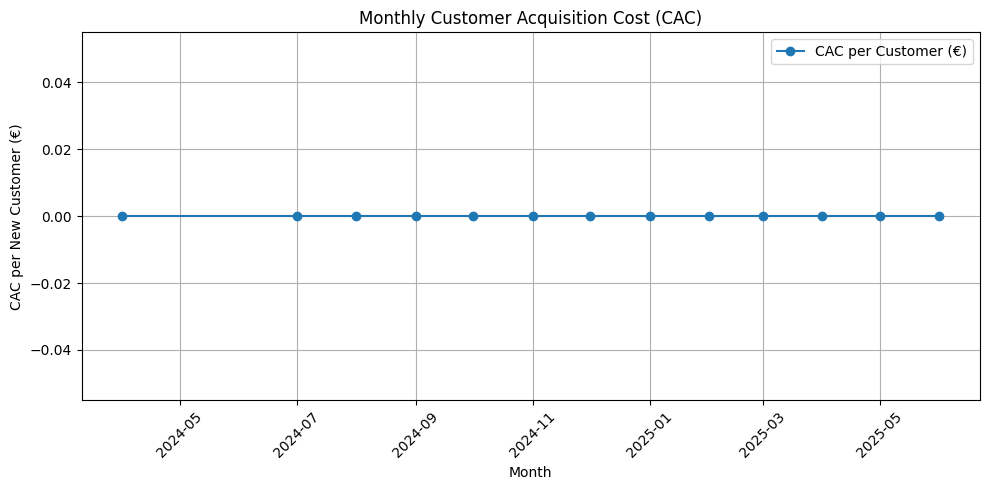

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_cac['month'], df_cac['cac_per_customer'], marker='o', label='CAC per Customer (€)')
plt.title("Monthly Customer Acquisition Cost (CAC)")
plt.xlabel("Month")
plt.ylabel("CAC per New Customer (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


6.7.1. Total Sales & Marketing Costs

In [ ]:
df_cac_purchases = df_purchases_enriched[df_purchases_enriched['cost_type'] == 'CAC'].copy()


In [ ]:
df_cac_purchases['date'] = pd.to_datetime(df_cac_purchases['date'], errors='coerce')
df_cac_purchases['month'] = df_cac_purchases['date'].dt.to_period('M').dt.to_timestamp()


In [ ]:
df_monthly_cac_costs = df_cac_purchases.groupby('month')['total'].sum().reset_index()
df_monthly_cac_costs.rename(columns={'total': 'cac_spend'}, inplace=True)


6.7.2. New Customers

In [ ]:
df_HD_invoices_clean['date'] = pd.to_datetime(df_HD_invoices_clean['date'], errors='coerce')
df_HD_invoices_clean['month'] = df_HD_invoices_clean['date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
df_first_invoice = df_HD_invoices_clean.sort_values('date').drop_duplicates(subset='contact', keep='first')

In [ ]:
df_new_customers = df_first_invoice.groupby('month')['contact'].nunique().reset_index()
df_new_customers.rename(columns={'contact': 'new_customers'}, inplace=True)


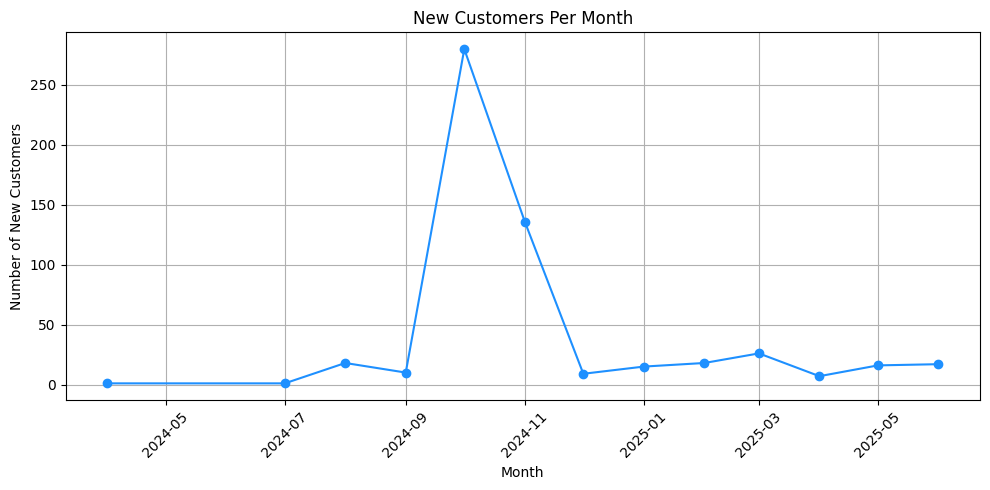

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_new_customers['month'], df_new_customers['new_customers'], marker='o', linestyle='-', color='dodgerblue')

plt.title("New Customers Per Month")
plt.xlabel("Month")
plt.ylabel("Number of New Customers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_new_customers['cumulative_customers'] = df_new_customers['new_customers'].cumsum()


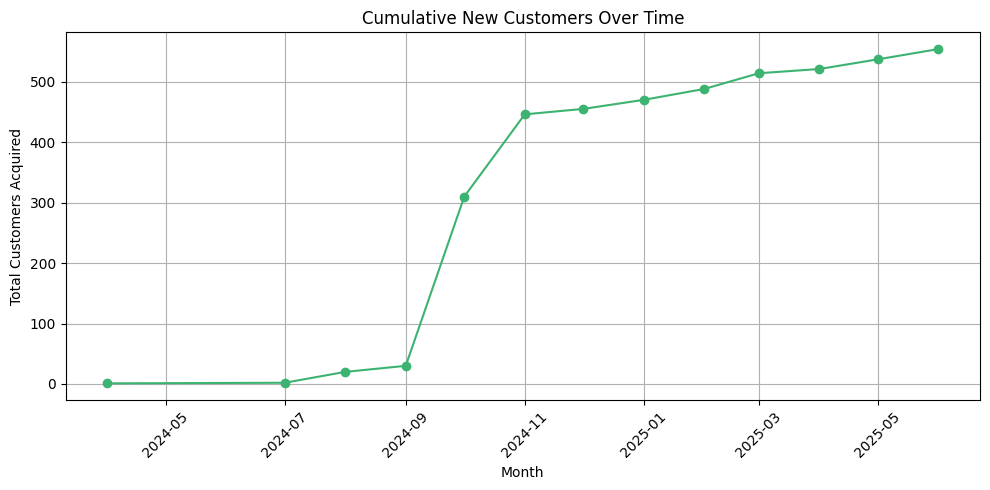

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_new_customers['month'], df_new_customers['cumulative_customers'], marker='o', color='mediumseagreen')
plt.title("Cumulative New Customers Over Time")
plt.xlabel("Month")
plt.ylabel("Total Customers Acquired")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_cac_purchases = df_purchases_enriched[df_purchases_enriched['cost_type'] == 'CAC'].copy()

In [ ]:
df_monthly_cac_costs = df_cac_purchases.groupby('month')['total'].sum().reset_index()
df_monthly_cac_costs.rename(columns={'total': 'cac_costs'}, inplace=True)
df_monthly_cac_costs['month'] = df_monthly_cac_costs['month'].dt.to_timestamp()

In [ ]:
df_cac = df_monthly_cac_costs.merge(df_new_customers, on='month', how='left')


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_cac['month'], df_cac['cac_per_customer'], marker='o', label='CAC per Customer (€)')

plt.title("Monthly Customer Acquisition Cost (CAC)")
plt.xlabel("Month")
plt.ylabel("CAC per New Customer (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'cac_per_customer'

<Figure size 1000x500 with 0 Axes>

In [ ]:
df_HD_purchases_clean['products'].value_counts().head(5)
# The 'products' column contains information at the level of expenses ('account', 'price', etc.)

products
[{'name': 'Fra. 3 KOMBO SOLUTIONS, S.L', 'desc': 'Fra. 3 KOMBO SOLUTIONS, S.L', 'price': 2916.67, 'units': 1, 'projectid': None, 'tax': 21, 'taxes': ['p_iva_21'], 'tags': [], 'discount': 0, 'retention': 0, 'weight': 0, 'costPrice': 0, 'sku': 0, 'account': '66a107fcafde0ca4240e0a40'}]    2
[{'name': 'Fra. 6 KOMBO SOLUTIONS, S.L', 'desc': 'Fra. 6 KOMBO SOLUTIONS, S.L', 'price': 2916.67, 'units': 1, 'projectid': None, 'tax': 21, 'taxes': ['p_iva_21'], 'tags': [], 'discount': 0, 'retention': 0, 'weight': 0, 'costPrice': 0, 'sku': 0, 'account': '66a107fcafde0ca4240e0a40'}]    2
[{'name': 'NUCLIO DIGITAL PLUS SL', 'desc': 'NUCLIO DIGITAL PLUS SL', 'price': 1000, 'units': 1, 'projectid': None, 'tax': 21, 'taxes': ['p_iva_21'], 'tags': [], 'discount': 0, 'retention': 0, 'weight': 0, 'costPrice': 0, 'sku': 0, 'account': '668572b91ef7394b7a07f1d9'}]                 2
[{'name': 'Fra. 4 KOMBO SOLUTIONS, S.L', 'desc': 'Fra. 4 KOMBO SOLUTIONS, S.L', 'price': 2916.67, 'units': 1, 'projectid'

In [ ]:
# 1. Extract account IDs from the products column

def extract_accounts(products):
    try:
        parsed = ast.literal_eval(products)
        return [p['account'] for p in parsed if 'account' in p]
    except:
        return []

df_HD_purchases_clean['account_ids'] = df_HD_purchases_clean['products'].apply(extract_accounts)

In [ ]:
# 2. Explode to one row per account

df_exploded = df_HD_purchases_clean.explode('account_ids')

In [ ]:
df_exploded[['account_ids']].head(10)

,account_ids
0,6694dc01140acf9e000425c2
1,668572ba1ef7394b7a07f1de
2,6694dc01140acf9e000425c2
3,6694dc01140acf9e000425c2
4,6694dc01140acf9e000425c2
5,6694dc01140acf9e000425c2
6,6694dc01140acf9e000425c2
7,66a1051a4e198333290c504a
8,6694dc01140acf9e000425c2
9,68680595b0333b5f71004617


In [ ]:
df_exploded.shape

(431, 31)

In [ ]:
df_exploded['desc']

0                          Fra. 1449FF9-0007 FULL ENRICH
1                       Fra. 25014245 CloudTalk S. Γ. O.
2                   Fra. 790-17050 Paddle.com Market Ltd
3                      Fra. 25365C73-0004 Deeptrace Inc.
4                   Fra. INV-12297 Norrsken Barcelona SL
5                       Fra. 7C9411E8-0004 Opusclip Inc.
6                       Fra. YNFE2AMJ-0009 ZenLeads Inc.
7                   Fra. 14/2025 MICHEL ESTOPIÑALES BLAY
8                        Fra. nº: 2 NO MORE UPDATES, S.L
9      Fra. 1000006858 - Empresa Nacional Innovación ...
10                      Fra. YNFE2AMJ-0008 ZenLeads Inc.
11                       Fra. A -15-2025 Ignacio Gaminde
12                       Fra. nº: 7 KOMBO SOLUTIONS, S.L
13                       Fra. INV-0043 Paraforma Pty Ltd
14                                 Fra. 07 D'ELIA ABRAMO
15             Fra. #F250226173 Holded Technologies S.L.
16          Fra. SBIE-8942649 Slack Technologies Limited
17                  Fra. 790-16

In [ ]:
# 3. Map account IDs to human-readable names

account_map = df_HD_expenses_clean.set_index('id')['name'].to_dict()
df_exploded['account_name'] = df_exploded['account_ids'].map(account_map)

In [ ]:
df_exploded['account_name'].dropna().unique()

array(['Software, herr.digitales', 'Suministros', 'Freelance HR',
       ' Intereses de deudas con entidades de crédito', 'Freelance Socio',
       'Servicios de profesionales independientes',
       'Gtos. viajes/desplazamientos/dietas', 'Otros servicios',
       'Servicios bancarios y similares', 'Primas de seguros', 'Referral',
       'Stripe comis.', 'Referidos',
       'Publicidad, propaganda y relaciones públicas',
       'Pte. identificar cta.'], dtype=object)

Serian los tags de la tabla Contacts los que nos dirian el tipo de gasto/coste (OPEX/COGS/...)

In [ ]:
# 4. Filter for relevant expense categories

df_marketing = df_exploded[df_exploded['account_name'].str.contains('marketing|publicidad|ads|comercial', case=False, na=False)]

In [ ]:
# 5. Aggregate marketing spend by month

df_marketing['month'] = pd.to_datetime(df_marketing['date']).dt.to_period('M')
df_monthly_marketing = df_marketing.groupby('month')['total'].sum().reset_index()
df_monthly_marketing.rename(columns={'total': 'marketing_costs'}, inplace=True)

C:\Users\r_tho\AppData\Local\Temp\ipykernel_32396\782154573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing['month'] = pd.to_datetime(df_marketing['date']).dt.to_period('M')


In [ ]:
df_marketing.shape

(2, 32)

In [ ]:
df_monthly_marketing.head(10)

,month,marketing_costs
0,2024-09,1452.0
1,2024-12,1452.0


6.7.2. Number of New Customers Acquired

In [ ]:
df_HD_invoices_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1111 non-null   object        
 1   contact          1111 non-null   object        
 2   contactName      1111 non-null   object        
 3   desc             1111 non-null   object        
 4   date             1111 non-null   datetime64[ns]
 5   dueDate          32 non-null     float64       
 6   multipledueDate  1111 non-null   object        
 7   forecastDate     0 non-null      float64       
 8   notes            1105 non-null   object        
 9   tags             1111 non-null   object        
 10  products         1111 non-null   object        
 11  tax              1111 non-null   float64       
 12  subtotal         1111 non-null   float64       
 13  discount         1111 non-null   float64       
 14  total            1111 non-null   float64

In [ ]:
df_HD_invoices_clean['tags'].value_counts()

tags
[]    1111
Name: count, dtype: int64

In [ ]:
df_HD_invoices_clean.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount,datetime,month,year
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.00,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
1,68640b2e4d4b9230af022eb5,67ae2899d92c82a3ed0c50ad,Manum Training & Development S.L,7BE139D9-5820,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 74.50413223...",15.65,74.50,0.0,90.15,es,1,[],F250384,eur,1,"[{'id': '6864fa85ba573f3f0e088f2c', 'amount': ...",90.15,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
2,68640b2e4d4b9230af022ec5,66e853461726c08ac9012017,Fever Labs Inc,7BE139D9-5824,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 868.67, 'un...",0.00,868.67,0.0,868.67,es,1,[],F250385,eur,1,"[{'id': '6864fa822531707a9909d4f3', 'amount': ...",868.67,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
3,68640b2e4d4b9230af022ed2,67ec0bbb7669e0088a063e01,Oriol MaynÃ©s,7BE139D9-5834,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 49, 'units'...",10.29,49.00,0.0,59.29,es,1,[],F250386,eur,1,"[{'id': '6864fa7f3842cb223003f776', 'amount': ...",59.29,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
4,68640b2f4d4b9230af022ee2,67ae2898d92c82a3ed0c5084,"4FOREVERYTHING, SL",7BE139D9-5841,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 98, 'units'...",20.58,98.00,0.0,118.58,es,1,[],F250387,eur,1,"[{'id': '6864fa7db66170a2ea06d733', 'amount': ...",118.58,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025


In [ ]:
# 1. Convert 'date' to datetime (if not already)
df_HD_invoices_raw['date'] = pd.to_datetime(df_HD_invoices_raw['date'], errors='coerce')


In [ ]:
# 2. Ensure 'month' column exists 
df_HD_invoices_raw['month'] = df_HD_invoices_raw['date'].dt.to_period("M")

In [ ]:
# 3. Drop rows where customer ID is missing
df_valid = df_HD_invoices_raw[df_HD_invoices_raw['contact'].notnull()].copy()

In [ ]:
# 4. Drop duplicates → only keep the *first invoice* for each customer per month
df_first_invoice = df_valid.drop_duplicates(subset=['month', 'contact'])

In [ ]:
# 5. Count unique customers by month
df_monthly_new_customers = df_first_invoice.groupby('month')['contact'].nunique().reset_index(name='new_customers')

In [ ]:
# 6. Optional: convert 'month' to timestamp for plotting or merging
df_monthly_new_customers['month'] = df_monthly_new_customers['month'].dt.to_timestamp()

In [ ]:
df_monthly_new_customers

,month,new_customers
0,2024-04-01,1
1,2024-05-01,1
2,2024-06-01,1
3,2024-07-01,2
4,2024-08-01,19
5,2024-09-01,27
6,2024-10-01,285
7,2024-11-01,329
8,2024-12-01,21
9,2025-01-01,36


________________________________________________________________

In [ ]:
len(df_CM_customers_clean)

200

In [ ]:
df_CM_customers_clean['customer-since'].isna().sum()

np.int64(81)

In [ ]:
df_HD_purchases_raw.columns

Index(['id', 'contact', 'contactName', 'desc', 'date', 'dueDate',
       'multipledueDate', 'forecastDate', 'notes', 'tags', 'products', 'tax',
       'subtotal', 'discount', 'total', 'language', 'status', 'customFields',
       'docNumber', 'currency', 'currencyChange', 'paymentsTotal',
       'paymentsPending', 'paymentsRefunds', 'paymentsDetail', 'from'],
      dtype='object')

In [ ]:
df_HD_purchases_clean['status'].value_counts()

status
1    417
0      8
Name: count, dtype: int64

In [ ]:
df_HD_purchases_raw.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsTotal,paymentsPending,paymentsRefunds,paymentsDetail,from
0,6870b8cf93b086c11f04777f,6694febb64ba6319900bcdcf,FULL ENRICH (FULL ENRICH),Fra. 1449FF9-0007 FULL ENRICH,2025-07-09 22:00:00,NaN,[],NaN,None,[],"[{'name': 'Fra. 1449FF9-0007 FULL ENRICH', 'de...",0.00,370.00,0,370.00,es,0,[],1449FF9-0007,eur,1.000000,0.00,370.00,0,NaN,NaN
1,686f9d91ac4a87122c029343,686f9d2da3972b9b98032aff,CloudTalk S. Γ. O. (CloudTalk S. Γ. O.),Fra. 25014245 CloudTalk S. Γ. O.,2025-07-07 22:00:00,NaN,[],NaN,,[moneda],"[{'name': 'Fra. 25014245 CloudTalk S. Γ. O.', ...",0.00,17.04,0,17.04,,0,[],25014245,usd,1.173489,0.00,17.04,0,NaN,NaN
2,686b7effcef17d44ef073c52,6694f881e793fd466106a51f,Paddle.com Market Ltd (Paddle.com Market Ltd),Fra. 790-17050 Paddle.com Market Ltd,2025-07-05 22:00:00,NaN,[],NaN,,[moneda],[{'name': 'Fra. 790-17050 Paddle.com Market Lt...,0.00,278.75,0,278.75,,0,[],790-17050,usd,1.176678,0.00,278.75,0,NaN,NaN
3,6867a5d2b3f63f45ae015c18,679aa945082f148e4508e16f,Deeptrace Inc. (Deeptrace Inc.),Fra. 25365C73-0004 Deeptrace Inc.,2025-07-02 22:00:00,NaN,[],NaN,,[],"[{'name': 'Fra. 25365C73-0004 Deeptrace Inc.',...",0.00,424.49,0,424.49,,1,[],25365C73-0004,usd,1.177881,424.49,0.00,0,"[{'id': '686807f7f5c7d4b88d0df1fe', 'amount': ...",NaN
4,6867bc4587b2b6c2920b14a3,683581fcddc06c80f30910a7,Norrsken Barcelona SL (Norrsken Barcelona SL),Fra. INV-12297 Norrsken Barcelona SL,2025-06-30 22:00:00,NaN,[],NaN,None,[],[{'name': 'Fra. INV-12297 Norrsken Barcelona S...,11.28,53.72,0,65.00,es,0,[],INV-12297,eur,1.000000,0.00,65.00,0,NaN,NaN


In [ ]:
df_HD_invoices_raw.columns

Index(['id', 'contact', 'contactName', 'desc', 'date', 'dueDate',
       'multipledueDate', 'forecastDate', 'notes', 'tags', 'products', 'tax',
       'subtotal', 'discount', 'total', 'language', 'status', 'customFields',
       'docNumber', 'currency', 'currencyChange', 'paymentsDetail',
       'paymentsTotal', 'paymentsPending', 'paymentsRefunds', 'shipping',
       'paymentMethodId', 'month'],
      dtype='object')

In [ ]:
df_HD_invoices_clean.columns

Index(['id', 'contact', 'contactName', 'desc', 'date', 'dueDate',
       'multipledueDate', 'forecastDate', 'notes', 'tags', 'products', 'tax',
       'subtotal', 'discount', 'total', 'language', 'status', 'customFields',
       'docNumber', 'currency', 'currencyChange', 'paymentsDetail',
       'paymentsTotal', 'paymentsPending', 'paymentsRefunds', 'shipping',
       'paymentMethodId', 'multipledueDate.date', 'multipledueDate.amount',
       'datetime', 'month', 'year'],
      dtype='object')

In [ ]:
df_HD_invoices_raw['tags'].value_counts()

tags
[]    1111
Name: count, dtype: int64

In [ ]:
df_HD_invoices_clean['tags'].value_counts()

tags
[]    1111
Name: count, dtype: int64

In [ ]:
df_HD_invoices_clean.head(5)

,id,contact,contactName,desc,date,dueDate,multipledueDate,forecastDate,notes,tags,products,tax,subtotal,discount,total,language,status,customFields,docNumber,currency,currencyChange,paymentsDetail,paymentsTotal,paymentsPending,paymentsRefunds,shipping,paymentMethodId,multipledueDate.date,multipledueDate.amount,datetime,month,year
0,68640b2e4d4b9230af022ea8,6852bf0ed7f7b87ec2042a11,MediaEngine Srl,7BE139D9-5817,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 99.83, 'uni...",0.00,99.83,0.0,99.83,es,1,[],F250383,eur,1,"[{'id': '6864fa8a1192b29d9d0c2745', 'amount': ...",99.83,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
1,68640b2e4d4b9230af022eb5,67ae2899d92c82a3ed0c50ad,Manum Training & Development S.L,7BE139D9-5820,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 74.50413223...",15.65,74.50,0.0,90.15,es,1,[],F250384,eur,1,"[{'id': '6864fa85ba573f3f0e088f2c', 'amount': ...",90.15,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
2,68640b2e4d4b9230af022ec5,66e853461726c08ac9012017,Fever Labs Inc,7BE139D9-5824,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 868.67, 'un...",0.00,868.67,0.0,868.67,es,1,[],F250385,eur,1,"[{'id': '6864fa822531707a9909d4f3', 'amount': ...",868.67,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
3,68640b2e4d4b9230af022ed2,67ec0bbb7669e0088a063e01,Oriol MaynÃ©s,7BE139D9-5834,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 49, 'units'...",10.29,49.00,0.0,59.29,es,1,[],F250386,eur,1,"[{'id': '6864fa7f3842cb223003f776', 'amount': ...",59.29,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025
4,68640b2f4d4b9230af022ee2,67ae2898d92c82a3ed0c5084,"4FOREVERYTHING, SL",7BE139D9-5841,2025-06-29,NaN,[],NaN,NaN,[],"[{'name': '', 'desc': '', 'price': 98, 'units'...",20.58,98.00,0.0,118.58,es,1,[],F250387,eur,1,"[{'id': '6864fa7db66170a2ea06d733', 'amount': ...",118.58,0.0,0.0,NaN,NaN,NaN,NaN,2025-06-29 22:00:00,2025-06-01,2025


In [ ]:
# Filter for confirmed expenses (e.g. status == 1)
df_operating_costs = df_HD_expenses_clean[df_HD_expenses_clean['status'] == 1].copy()

# Group by month and sum
df_monthly_opex = df_operating_costs.groupby('month')['total'].sum().reset_index()
df_monthly_opex.rename(columns={'total': 'operating_expenses'}, inplace=True)

# Sort by month
df_monthly_opex = df_monthly_opex.sort_values('month')


KeyError: 'status'

_____________________________________

In [ ]:
# ************************
def get_common_values(df1, col1, df2, col2):
    """
    Returns the set of common values between df1[col1] and df2[col2].

    Args:
        df1 (pd.DataFrame): First DataFrame
        col1 (str): Column name from df1
        df2 (pd.DataFrame): Second DataFrame
        col2 (str): Column name from df2

    Returns:
        set: A set of values that appear in both columns
    """
    values1 = set(df1[col1].dropna().unique())
    values2 = set(df2[col2].dropna().unique())
    return values1 & values2  # intersection

matches = get_common_values(df_HD_invoices_clean, 'id', df_HD_expenses_clean, 'id')
print(matches)


# ************************

# There are no matches in the Expenses id and the Invoices id. 

set()


In [ ]:
# **************************
df_HD_payments_clean.columns
# **************************

Index(['id', 'bankId', 'contactId', 'contactName', 'amount', 'desc', 'change',
       'documentType', 'documentId', 'payment_date', 'datetime', 'date',
       'month', 'year'],
      dtype='object')

In [ ]:
# ************************
def get_common_values(df1, col1, df2, col2):
    """
    Returns the set of common values between df1[col1] and df2[col2].

    Args:
        df1 (pd.DataFrame): First DataFrame
        col1 (str): Column name from df1
        df2 (pd.DataFrame): Second DataFrame
        col2 (str): Column name from df2

    Returns:
        set: A set of values that appear in both columns
    """
    values1 = set(df1[col1].dropna().unique())
    values2 = set(df2[col2].dropna().unique())
    return values1 & values2  # intersection

matches = get_common_values(df_HD_payments_clean, 'id', df_HD_expenses_clean, 'id')
print(matches)


# ************************

# There are no matches in the Expenses id and the Payments id. 

set()


In [ ]:
df_HD_purchases_clean.info()
# date is not datetime data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      202 non-null    object 
 1   contact                 202 non-null    object 
 2   contactName             202 non-null    object 
 3   desc                    202 non-null    object 
 4   date                    202 non-null    object 
 5   dueDate                 6 non-null      float64
 6   multipledueDate         196 non-null    object 
 7   forecastDate            0 non-null      float64
 8   notes                   0 non-null      float64
 9   tags                    202 non-null    object 
 10  products                202 non-null    object 
 11  tax                     202 non-null    float64
 12  subtotal                202 non-null    float64
 13  discount                202 non-null    int64  
 14  total                   202 non-null    fl

In [ ]:
# Convert 'date' column data type from object to datetime
df_HD_purchases_clean['datetime'] = pd.to_datetime(df_HD_purchases_clean['date'], errors='coerce')
df_HD_purchases_clean['date'] = df_HD_purchases_clean['datetime'].dt.date
df_HD_purchases_clean['month'] = df_HD_purchases_clean['datetime'].dt.to_period('M').dt.to_timestamp()


In [ ]:
# Keep only purchases with status == 1
df_operating_costs = df_HD_purchases_clean[df_HD_purchases_clean['status'] == 1].copy()

In [ ]:
# Aggregate monthly totals
df_monthly_operating_costs = (
    df_operating_costs.groupby('month')['total'].sum().reset_index()
)
df_monthly_operating_costs.rename(columns={'total': 'operating_costs'}, inplace=True)


In [ ]:
df_monthly_revenue['month'] = pd.to_datetime(df_monthly_revenue['date']).dt.to_period('M').dt.to_timestamp()

KeyError: 'date'

In [ ]:
ebitda_df = pd.merge(df_monthly_revenue, df_monthly_operating_costs, on='month', how='left')

In [ ]:
ebitda_df['EBITDA'] = ebitda_df['revenue'] - ebitda_df['operating_costs']

In [ ]:
df_monthly_operating_costs.head(5)

,month,operating_costs
0,2024-12-01,4237.66


6.6.3. Merge Revenue and Operating Costs dataframes

In [ ]:
ebitda_df = pd.merge(df_monthly_revenue, df_monthly_operating_costs, on='date', how='left')


KeyError: 'date'

____________________________________

In [ ]:
# Merge Expenses and Invoices tables

# Rename 'id' in invoices to avoid confusion after merge
df_HD_invoices_clean_renamed = df_HD_invoices_clean.rename(columns={'id': 'invoice_id', 'date': 'invoice_date'})

# Also rename 'id' in expenses (temporarily)
df_HD_expenses_clean_renamed = df_HD_expenses_clean.rename(columns={'id': 'invoice_id'})

# Merge expenses with invoice dates
df_HD_expenses_merged = df_HD_expenses_clean_renamed.merge(
    df_HD_invoices_clean_renamed[['invoice_id', 'invoice_date']],
    on='invoice_id',
    how='left'
)

# Convert 'invoice_date' to datetime if needed
df_HD_expenses_merged['invoice_date'] = pd.to_datetime(df_HD_expenses_merged['invoice_date'], errors='coerce')

# Confirm result
df_HD_expenses_merged[['invoice_id', 'invoice_date']].head()


,invoice_id,invoice_date
0,669fbd0a334dc06d2b014bf9,NaT
1,669e994937430c98a60d9470,NaT
2,668572b91ef7394b7a07f1d7,NaT
3,668572b91ef7394b7a07f1d3,NaT
4,668572b91ef7394b7a07f1d2,NaT


In [ ]:
# Filter for Operating Expenses only  

# Keywords to identify operating expenses
keywords = [
    'Sueldos', 'Freelance', 'Publicidad', 'Referidos', 'Referral',
    'Suministros', 'Software', 'Transportes', 'Servicios', 'Primas',
    'Gtos. viajes', 'Otros servicios', 'Reparaciones'
]

# Filter the dataframe
df_op_expenses = df_HD_expenses_clean[
    df_HD_expenses_clean['name'].str.contains('|'.join(keywords), case=False, na=False)
].copy()


In [ ]:
# Summarise Operating Expenses Monthly
df_op_expenses['month'] = pd.to_datetime(df_op_expenses['date']).dt.to_period('M')

monthly_op_expenses = (
    df_op_expenses.groupby('month')['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'op_expenses'})
)

monthly_op_expenses['month'] = monthly_op_expenses['month'].astype(str)


KeyError: 'date'

6.6.3. Calculate EBITDA

In [ ]:
# We have Revenue and Operating costs dataframes.
df_ebitda = pd.merge(monthly_revenue_df, monthly_opcosts_df, on='month', how='outer')
df_ebitda.fillna(0, inplace=True)

In [ ]:
df_ebitda['ebitda'] = df_ebitda['revenue'] - df_ebitda['op_costs']


___________________________

__________________________________________

In [ ]:
# 🧼 Step 1: Sanity check for invalid values
print("NaNs:", df_HD_contacts['customId'].isna().sum())
print("Infs:", df_HD_contacts['customId'].isin([float('inf'), float('-inf')]).sum())
print("Dtype before:", df_HD_contacts['customId'].dtype)

# 🧽 Step 2: Force float conversion (cleans mixed values)
df_HD_contacts['customId'] = pd.to_numeric(df_HD_contacts['customId'], errors='coerce')

# 🚧 Step 3: Now safely convert to nullable integer
df_HD_contacts['customId'] = df_HD_contacts['customId'].astype('Int64')

# 🔍 Step 4: Confirm success
print("Dtype after:", df_HD_contacts['customId'].dtype)


NaNs: 419
Infs: 0
Dtype before: Int64
Dtype after: Int64


In [ ]:
df_HD_contacts.head(3)

,id,customId,name,code,vatnumber,tradeName,email,mobile,phone,type,iban,swift,groupId,clientRecord,customFields,socialNetworks,tags,notes,contactPersons,shippingAddresses,isperson,createdAt,updatedAt,updatedHash,supplierRecord.num,supplierRecord.name,billAddress.address,billAddress.city,billAddress.postalCode,billAddress.province,billAddress.country,billAddress.countryCode,billAddress.info,defaults.salesChannel,defaults.expensesAccount,defaults.dueDays,defaults.paymentDay,defaults.paymentMethod,defaults.discount,defaults.language,defaults.currency,defaults.salesTax,defaults.purchasesTax,defaults.accumulateInForm347,defaults.expensesAccount.$oid,socialNetworks.website,supplierRecord,clientRecord.num,clientRecord.name,defaults.salesChannel.$oid
0,6694f45fc6f6db032502c35b,5863162,Framer B.V.,NL853695386B01,NL853695386B01,Framer B.V.,NaN,NaN,NaN,supplier,NaN,NaN,NaN,0.0,[],[],[],[],[],[],0,2024-07-15 10:05:19,2024-09-10 10:53:03,2ec0a8f88f80579e5dc5501f64a28289,40000001.0,Framer B.V.,NaN,NaN,NaN,NaN,Países Bajos,NL,NaN,0,6694dc01140acf9e000425c2,0,0,0,0,es,eur,[],[],no,NaN,NaN,NaN,NaN,NaN,NaN
1,6694f5a3919746067d00ab14,5863272,"KOMBO SOLUTIONS, S.L",B70637756,B70637756,"KOMBO SOLUTIONS, S.L",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0.0,[],NaN,[],[],[],[],0,2024-07-15 10:10:43,2024-10-31 12:35:51,44e537a35ce178bfd9f547562ee0b2b8,40000002.0,"KOMBO SOLUTIONS, S.L",NaN,NaN,8013.0,NaN,España,ES,NaN,0,NaN,0,0,0,0,es,eur,[],['p_iva_21'],yes,66a107fcafde0ca4240e0a40,NaN,NaN,NaN,NaN,NaN
2,6694f65bad0998298507286e,5863352,"CEASA ASESORES FISCALES, S.L.",B60036787,B60036787,"CEASA ASESORES FISCALES, S.L.",NaN,NaN,NaN,supplier,NaN,NaN,NaN,0.0,[],NaN,[],[],[],[],0,2024-07-15 10:13:47,2024-10-31 12:36:53,bdae29850a0ba724a9e27533959653e3,41000002.0,"CEASA ASESORES FISCALES, S.L.",NaN,NaN,8007.0,NaN,España,ES,NaN,0,NaN,0,0,0,0,es,eur,[],['p_iva_21'],yes,668572b91ef7394b7a07f1d9,NaN,NaN,NaN,NaN,NaN


In [ ]:
def find_column_value_matches(df1, cols1, df2, cols2):
    matches = {}
    total_matches = 0
    match_records = []

    for col1 in cols1:
        df1_vals = df1[col1].dropna().astype(str).unique()

        for col2 in cols2:
            df2_vals = df2[col2].dropna().astype(str).unique()
            common = set(df1_vals) & set(df2_vals)

            if common:
                key = f"{col1} ↔ {col2}"
                match_list = list(common)
                matches[key] = match_list
                total_matches += len(match_list)

                # Record each match for DataFrame
                for val in match_list:
                    match_records.append({
                        'df1_column': col1,
                        'df2_column': col2,
                        'matched_value': val
                    })

    # Convert matches to DataFrame
    match_df = pd.DataFrame(match_records)

    return matches, total_matches, match_df




In [ ]:
# MATCHES BETWEEN ChartMogul>Customers AND Holded>Contacts ID COLUMN VALUES

matches, total_matches, match_df = find_column_value_matches(
    df1=df_CM_customers,
    cols1=['id', 'uuid', 'external_id', 'name'],
    df2=df_HD_contacts,
    cols2=['id', 'customId', 'name', 'tradeName']
)

for pair, values in matches.items():
    print(f"{pair}: {len(values)} match(es)")
    print("Example values:", values[:5])

print(f"\n✅ Total matches: {total_matches} out of df1's {len(df_CM_customers)} rows and df2's {len(df_HD_contacts)} rows")
print("\n🧾 Match DataFrame preview:")
print(match_df.head())


name ↔ name: 69 match(es)
Example values: ['javier+1@evolmind.com', 'Marketing TI SPA', '4FOREVERYTHING, SL', 'Oriol', 'Coberio SL']
name ↔ tradeName: 2 match(es)
Example values: ['DISTANT FUTURE SL', 'OPENWEBINARS SL']

✅ Total matches: 71 out of df1's 200 rows and df2's 498 rows

🧾 Match DataFrame preview:
  df1_column df2_column          matched_value
0       name       name  javier+1@evolmind.com
1       name       name       Marketing TI SPA
2       name       name     4FOREVERYTHING, SL
3       name       name                  Oriol
4       name       name             Coberio SL


In [ ]:
# MATCHES BETWEEN ChartMogul>Customers AND Holded>Invoices ID COLUMN VALUES

matches, total_matches, match_df = find_column_value_matches(
    df1=df_CM_customers,
    cols1=['id', 'uuid', 'external_id', 'name'],
    df2=df_HD_invoices,
    cols2=['id', 'contact', 'contactName']
)

for pair, values in matches.items():
    print(f"{pair}: {len(values)} match(es)")
    print("Example values:", values[:5])

print(f"\n✅ Total matches: {total_matches}  out of df1's {len(df_CM_customers)} rows and df2's {len(df_HD_invoices)} rows")
print("\n🧾 Match DataFrame preview:")
print(match_df.head())


name ↔ contactName: 51 match(es)
Example values: ['Marketing TI SPA', '4FOREVERYTHING, SL', 'Oriol', 'Coberio SL', 'JAMES MORAN']

✅ Total matches: 51  out of df1's 200 rows and df2's 223 rows

🧾 Match DataFrame preview:
  df1_column   df2_column       matched_value
0       name  contactName    Marketing TI SPA
1       name  contactName  4FOREVERYTHING, SL
2       name  contactName               Oriol
3       name  contactName          Coberio SL
4       name  contactName         JAMES MORAN


6. 